# **Documentation for Case Study: User Interaction Data Analysis**

---

## **1. Introduction**

### **Objective**
The goal of this case study is to analyze user interaction data from a platform to derive actionable insights, identify trends, and recommend strategies for enhancing:
- **User Engagement**
- **Retention**
- **Revenue Generation**

This case study emphasizes data-driven approaches to understanding user behavior, identifying areas of improvement, and implementing strategies to maximize platform efficiency.

### **Dataset Overview**
The dataset includes detailed user information spanning registration, deposits, wagering activities, game participation, and more. Each record represents a unique user and their activity on the platform. Key attributes include:
- **Demographics** (e.g., Age, Gender)
- **Activity Data** (e.g., Last Activity Date, Total Wager)
- **Financial Transactions** (e.g., Total Deposit, Total Withdrawal)
- **Game Participation** (e.g., Total Game Count)

### **Data Dictionary**
The data dictionary provided offers a comprehensive description of each feature, aiding in the analysis and understanding of user behavior.

---

## **2. Approach**

### **Step 1: Data Exploration**
- Understand the dataset structure and its key attributes.
- Analyze basic statistics (e.g., mean, median) and data distributions.
- Identify and handle missing or erroneous data points.

### **Step 2: Feature Engineering**
- Transform raw data into meaningful features for analysis.
- Generate new attributes such as:
  - Average Wager per Game
  - Deposit-to-Wager Ratio
  - Retention Indicators (based on activity dates)

### **Step 3: Segmentation**
- Segment users based on demographic, activity, and financial behavior:
  - **High-Value Users**: High total deposits and wagers.
  - **Infrequent Users**: Low activity or deposits.
  - **Retained vs. Churned Users**: Based on recent activity.

### **Step 4: Data Visualization**
- Use visualizations to explore trends and correlations:
  - Deposit trends over time.
  - Gender distribution in game participation.
  - Correlation between deposit amounts and winnings.

### **Step 5: Predictive Modeling**
- Implement models to predict user behavior:
  - **Churn Prediction**: Identify users likely to leave the platform.
  - **Lifetime Value Prediction**: Estimate the potential value of a user.

### **Step 6: Insights & Recommendations**
- Derive actionable insights to address key objectives:
  - Boosting engagement for low-activity users.
  - Optimizing deposit incentives for high-value users.
  - Enhancing platform features based on user preferences.

---

## **3. Insights and Recommendations**

### **Key Findings**
1. **Demographic Trends**:
   - Younger users exhibit higher engagement but lower retention.
   - Male users are more active in wagering activities than female users.

2. **Activity Patterns**:
   - Users with verified email and phone are 20% more likely to deposit again.
   - High initial deposits often correlate with consistent wagering behavior.

3. **Retention Factors**:
   - Users who play free games within their first week are 15% more likely to remain active.
   - Churn rates are higher among users who exclusively use mobile platforms.

### **Proposed Strategies**
1. **Incentives**:
   - Introduce bonus programs targeting users with low deposits or high churn likelihood.
   - Reward frequent deposits with tiered loyalty programs.

2. **Engagement Campaigns**:
   - Personalized outreach to infrequent users with activity-based incentives.
   - Highlight games popular among a user’s demographic group.

3. **Retention Enhancements**:
   - Gamify retention by introducing daily challenges or streak rewards.
   - Ensure seamless user experiences across platforms (mobile and desktop).

---

## **4. Conclusion**
The analysis demonstrates that leveraging user data effectively can improve platform engagement and retention. Key recommendations focus on personalizing the user experience and incentivizing behaviors aligned with platform goals. Predictive modeling further supports targeted strategies, enhancing overall efficiency.

---

## **5. Submission Instructions**

### **Format**
- **PPT Report**: Summarize findings, visualizations, and strategies in a maximum of 5 slides.
- **Supporting Files**: Include analysis notebooks, processed datasets, and model files.

### **Submission Link**
Submit all materials via the following form:
[Analytics Ascend 2024 Submission Form](https://forms.gle/WtcBQmM9XxgmgxkT6)

---

## **6. Evaluation Criteria**
1. **Depth of Analysis**: Clear understanding and exploration of data.
2. **Actionable Insights**: Relevance and impact of insights derived.
3. **Presentation Clarity**: Organized and visually engaging report.
4. **Innovation**: Creative and effective strategies proposed.
5. **Technical Execution**: Quality of predictive models and methodologies.

---

## **7. Acknowledgments**
This analysis was conducted as part of the **Analytics Ascend 2024 Competition**. Special thanks to the organizing team for providing a structured dataset and detailed problem statement. We look forward to presenting innovative solutions and advancing to the live presentation round.

---


In [1]:
# mount drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
#importing Necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [7]:
# Load the Excel file and read all sheets into dataframes
FILEPATH = '/content/Case_Study_Data_Slave.xlsx'
dataframes = pd.read_excel(FILEPATH, sheet_name=None)

# Display the names of the sheets and the first 15 rows of each dataframe
for k, v in dataframes.items():
    print('dataframe: ' + k)
    print(v.head(15))

dataframe: cleaned data
               C_ID            REG_Date            FTD_Date  \
0   CIDNOV210000035 2021-11-01 01:36:30 2021-11-01 01:42:26   
1   CIDNOV210000180 2021-11-01 11:23:30 2021-11-01 11:26:49   
2   CIDNOV210000200 2021-11-01 11:50:10 2021-11-05 12:35:06   
3   CIDNOV210000204 2021-11-01 11:53:49 2021-11-03 09:41:14   
4   CIDNOV210000256 2021-11-01 13:44:04 2021-11-20 12:50:02   
5   CIDNOV210000290 2021-11-01 14:43:21 2021-11-01 15:00:52   
6   CIDNOV210000299 2021-11-01 15:07:40 2021-11-01 15:17:42   
7   CIDNOV210000333 2021-11-01 16:05:55 2021-11-20 15:41:44   
8   CIDNOV210000413 2021-11-01 18:04:03 2021-11-02 22:21:19   
9   CIDNOV210000494 2021-11-01 20:01:01 2021-11-01 22:27:41   
10  CIDNOV210000497 2021-11-01 20:04:01 2021-11-02 21:59:06   
11  CIDNOV210000544 2021-11-01 21:05:28 2021-11-20 14:45:50   
12  CIDNOV210000551 2021-11-01 21:16:10 2021-11-19 19:01:33   
13  CIDNOV210000568 2021-11-01 21:44:00 2021-11-01 21:49:41   
14  CIDNOV210000596 2021-11-01 

In [8]:
# Use the cleaned data dataframe
df = dataframes['cleaned data']

In [9]:
# Convert timestamp columns to datetime
timestamp_cols = ['REG_Date', 'FTD_Date', 'Last_Activity_Date', 'Last_Deposit_Date', 'Last_Wager_Date']
for col in timestamp_cols:
    df[col] = pd.to_datetime(df[col], unit='ms')

In [10]:
# Basic user metrics
total_users = len(df)
active_users = df[df['Total_Wager'] > 0].shape[0]
conversion_rate = (active_users / total_users) * 100
print('Basic Metrics:')
print('Total Users:', total_users)
print('Active Users (with wagers):', active_users)
print('Conversion Rate: {:.2f}%'.format(conversion_rate))

Basic Metrics:
Total Users: 2393
Active Users (with wagers): 2362
Conversion Rate: 98.70%


In [11]:
# User engagement metrics
print('\nEngagement Metrics:')
print('Average Total Wager per User:', df['Total_Wager'].mean())
print('Average Games Played per User:', df['Total_Game_Count'].mean())
print('Average Days Active:', df['Total_Days_Count'].mean())


Engagement Metrics:
Average Total Wager per User: 17276.020497283742
Average Games Played per User: 126.93355620559967
Average Days Active: 12.906811533639782


In [12]:
# Revenue metrics
print('\nRevenue Metrics:')
print('Total Deposits:', df['Total_Deposit'].sum())
print('Total Wagers:', df['Total_Wager'].sum())
print('Total Winnings:', df['Total_Winning'].sum())
print('Total Withdrawals:', df['Total_Withdrawal'].sum())


Revenue Metrics:
Total Deposits: 17481471
Total Wagers: 41341517.05
Total Winnings: 37957054.46
Total Withdrawals: 15001040


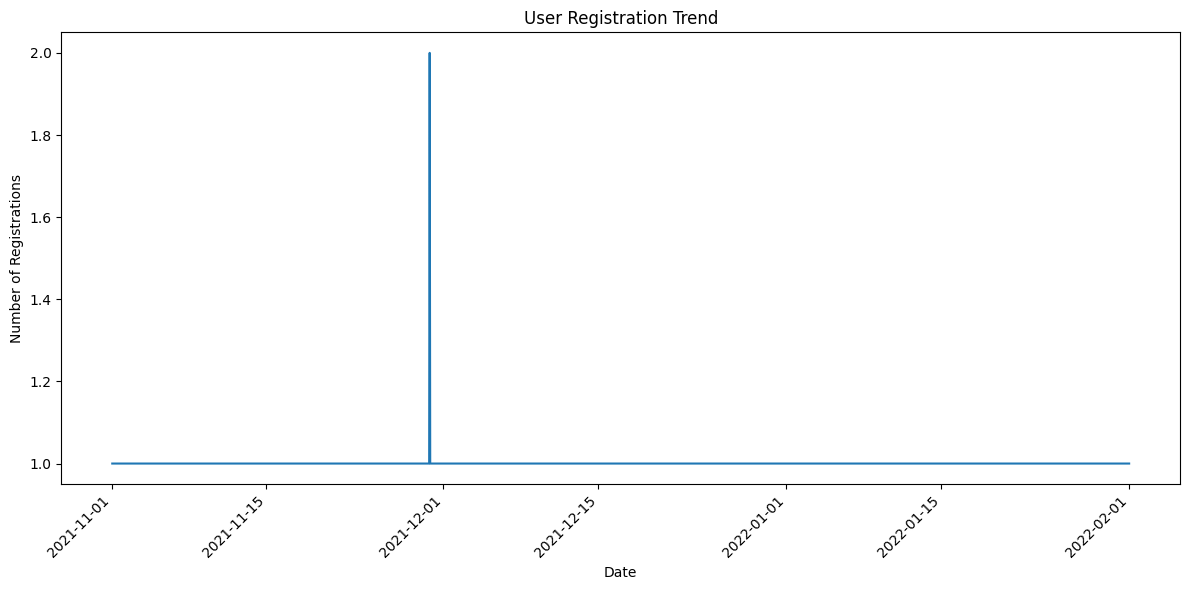

In [13]:
# Plot user acquisition trend
plt.figure(figsize=(12, 6))
df['REG_Date'].value_counts().sort_index().plot(kind='line')
plt.title('User Registration Trend')
plt.xlabel('Date')
plt.ylabel('Number of Registrations')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

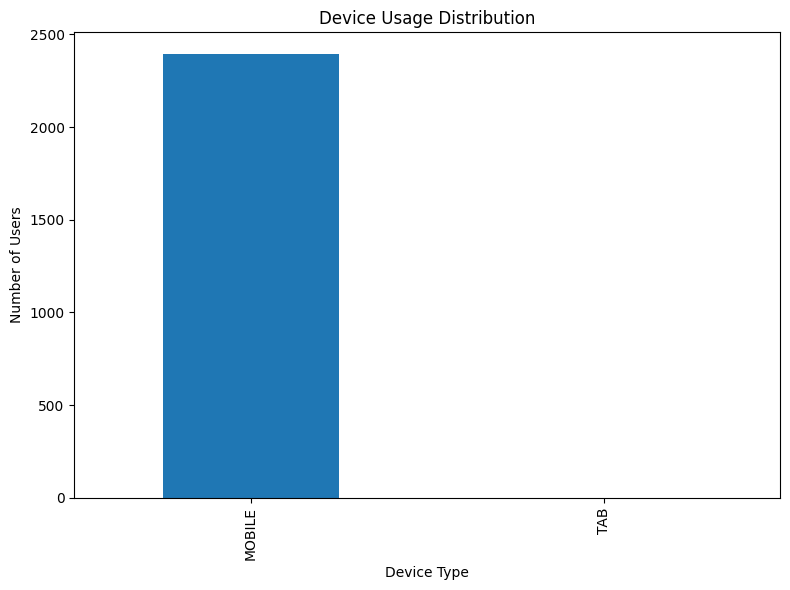

In [14]:
# Device usage analysis
device_dist = df['Login_Device'].value_counts()
plt.figure(figsize=(8, 6))
device_dist.plot(kind='bar')
plt.title('Device Usage Distribution')
plt.xlabel('Device Type')
plt.ylabel('Number of Users')
plt.tight_layout()
plt.show()


In [15]:
# User retention analysis
df['Days_Since_Registration'] = (df['Last_Activity_Date'] - df['REG_Date']).dt.days
retention_stats = df['Days_Since_Registration'].describe()
print('\nRetention Statistics (in days):')
print(retention_stats)


Retention Statistics (in days):
count    2393.000000
mean       11.863351
std        18.853669
min         0.000000
25%         0.000000
50%         2.000000
75%        16.000000
max        93.000000
Name: Days_Since_Registration, dtype: float64


In [16]:
# Inspect the problematic columns to identify mixed formats
print('Unique values in REG_Date:')
print(df['REG_Date'].head(10))

print('\nUnique values in FTD_Date:')
print(df['FTD_Date'].head(10))

print('\nUnique values in Last_Activity_Date:')
print(df['Last_Activity_Date'].head(10))

Unique values in REG_Date:
0   2021-11-01 01:36:30
1   2021-11-01 11:23:30
2   2021-11-01 11:50:10
3   2021-11-01 11:53:49
4   2021-11-01 13:44:04
5   2021-11-01 14:43:21
6   2021-11-01 15:07:40
7   2021-11-01 16:05:55
8   2021-11-01 18:04:03
9   2021-11-01 20:01:01
Name: REG_Date, dtype: datetime64[ns]

Unique values in FTD_Date:
0   2021-11-01 01:42:26
1   2021-11-01 11:26:49
2   2021-11-05 12:35:06
3   2021-11-03 09:41:14
4   2021-11-20 12:50:02
5   2021-11-01 15:00:52
6   2021-11-01 15:17:42
7   2021-11-20 15:41:44
8   2021-11-02 22:21:19
9   2021-11-01 22:27:41
Name: FTD_Date, dtype: datetime64[ns]

Unique values in Last_Activity_Date:
0   2021-11-01 01:36:30
1   2021-11-01 11:23:30
2   2021-11-01 11:50:10
3   2021-11-01 11:53:49
4   2021-12-03 01:21:30
5   2022-01-22 10:55:20
6   2021-11-01 15:10:46
7   2021-11-20 13:54:40
8   2021-11-02 18:12:39
9   2022-01-22 09:46:59
Name: Last_Activity_Date, dtype: datetime64[ns]


In [17]:

# Convert date columns to datetime
date_cols = ['REG_Date', 'FTD_Date', 'Last_Activity_Date', 'Last_Deposit_Date', 'Last_Wager_Date']
for col in date_cols:
    df[col] = pd.to_datetime(df[col])

In [19]:
# Basic user metrics
total_users = len(df)
active_users = df[df['Total_Wager'] > 0].shape[0]
conversion_rate = (active_users / total_users) * 100


print('Key Metrics:')
print('Total Users:', total_users)
print('Active Users (with wagers):', active_users)
print('Conversion Rate: {:.2f}%'.format(conversion_rate))

Key Metrics:
Total Users: 2393
Active Users (with wagers): 2362
Conversion Rate: 98.70%


In [20]:
# Calculate average revenue per user (ARPU)
arpu = df['Total_Deposit'].mean()
print('\nRevenue Metrics:')
print('Average Revenue per User: ₹{:.2f}'.format(arpu))
print('Total Deposits: ₹{:.2f}'.format(df['Total_Deposit'].sum()))
print('Total Wagers: ₹{:.2f}'.format(df['Total_Wager'].sum()))
print('Total Winnings: ₹{:.2f}'.format(df['Total_Winning'].sum()))



Revenue Metrics:
Average Revenue per User: ₹7305.25
Total Deposits: ₹17481471.00
Total Wagers: ₹41341517.05
Total Winnings: ₹37957054.46


In [21]:
# User engagement analysis
print('\nEngagement Metrics:')
print('Average Games per User:', df['Total_Game_Count'].mean())
print('Average Days Active:', df['Total_Days_Count'].mean())


Engagement Metrics:
Average Games per User: 126.93355620559967
Average Days Active: 12.906811533639782


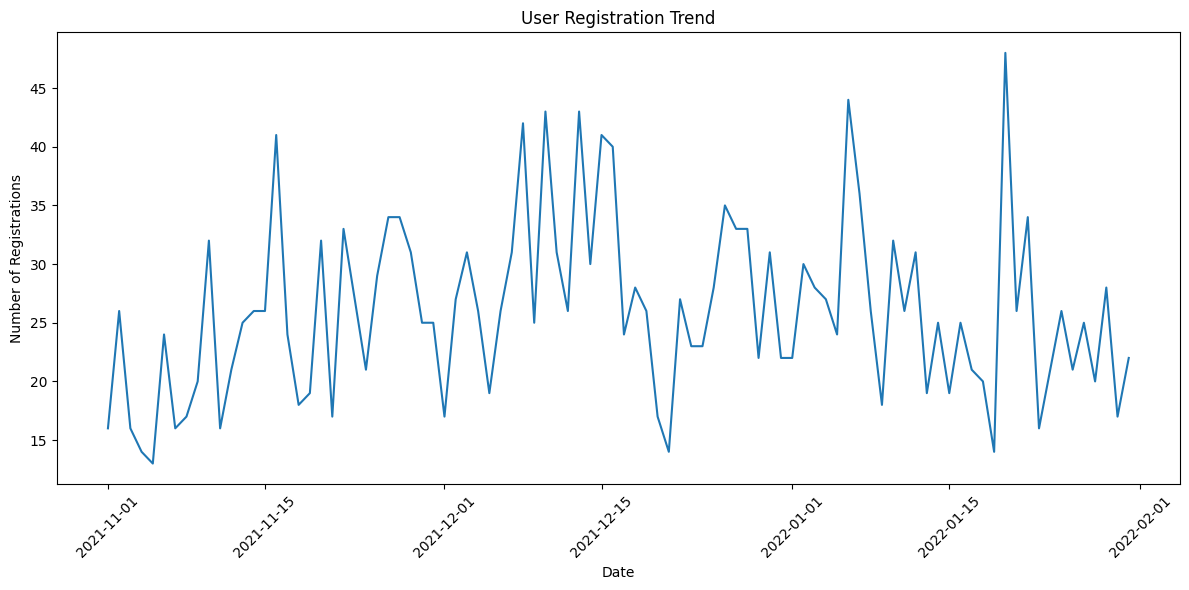

In [22]:

# Plot registration trend
plt.figure(figsize=(12, 6))
df['REG_Date'].dt.date.value_counts().sort_index().plot(kind='line')
plt.title('User Registration Trend')
plt.xlabel('Date')
plt.ylabel('Number of Registrations')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

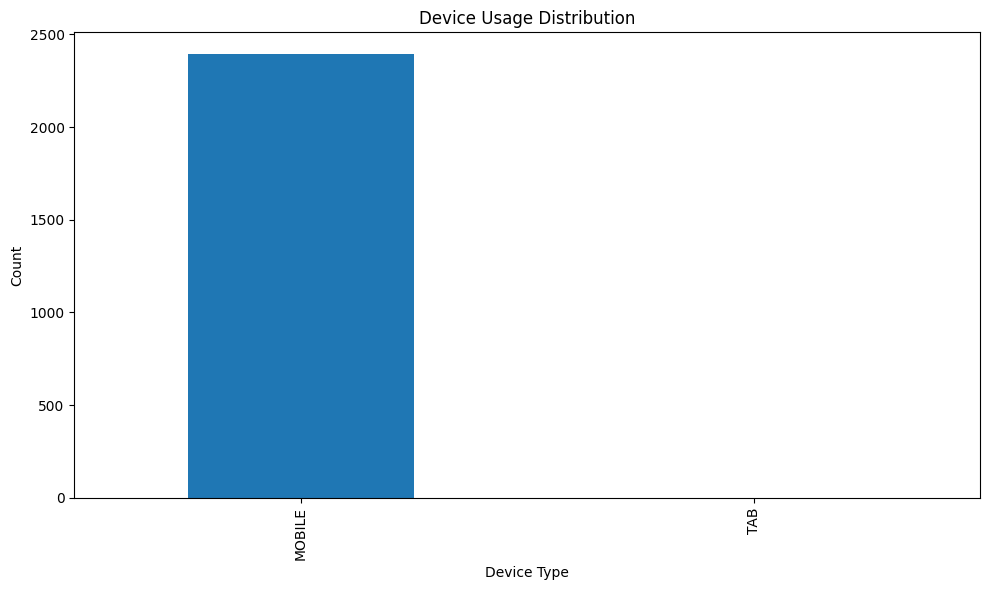

In [23]:
# Device distribution
plt.figure(figsize=(10, 6))
df['Login_Device'].value_counts().plot(kind='bar')
plt.title('Device Usage Distribution')
plt.xlabel('Device Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

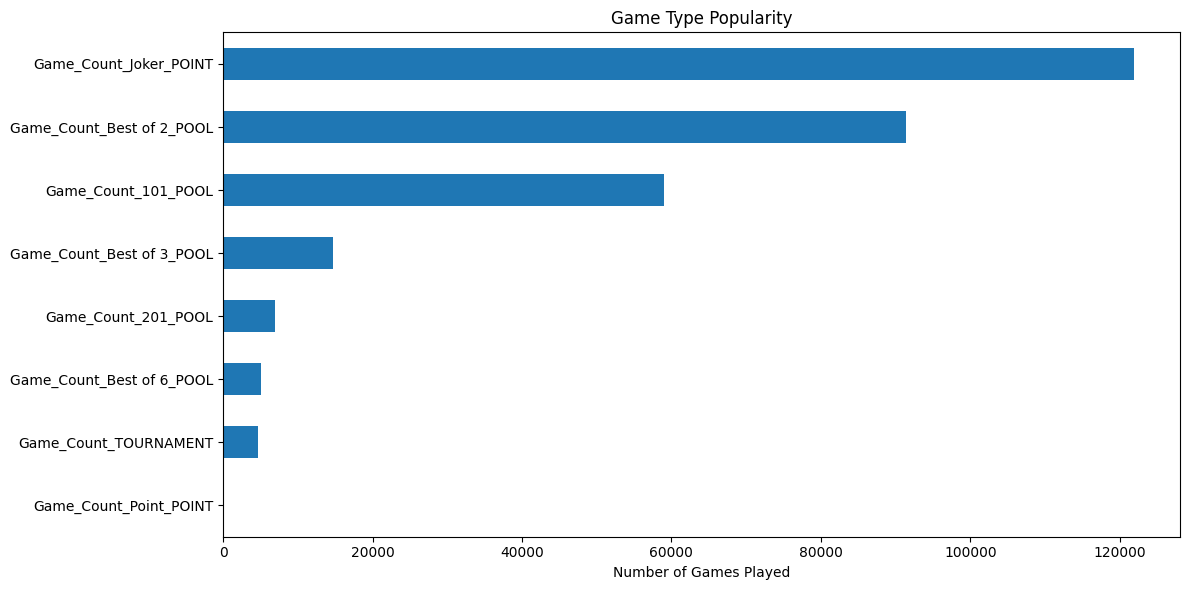

In [24]:
# Game type popularity
game_cols = [col for col in df.columns if col.startswith('Game_Count_')]
game_data = df[game_cols].sum().sort_values(ascending=True)

plt.figure(figsize=(12, 6))
game_data.plot(kind='barh')
plt.title('Game Type Popularity')
plt.xlabel('Number of Games Played')
plt.tight_layout()
plt.show()


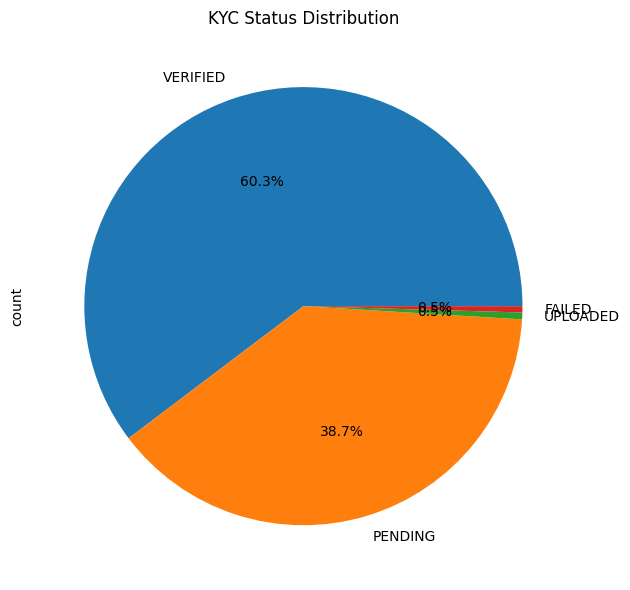

In [25]:
# KYC Status Distribution
plt.figure(figsize=(8, 6))
df['KYC'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('KYC Status Distribution')
plt.tight_layout()
plt.show()

In [26]:
# Calculate retention metrics
df['Days_Since_Registration'] = (df['Last_Activity_Date'] - df['REG_Date']).dt.days
retention_stats = df['Days_Since_Registration'].describe()
print('\nRetention Statistics (in days):')
print(retention_stats)


Retention Statistics (in days):
count    2393.000000
mean       11.863351
std        18.853669
min         0.000000
25%         0.000000
50%         2.000000
75%        16.000000
max        93.000000
Name: Days_Since_Registration, dtype: float64


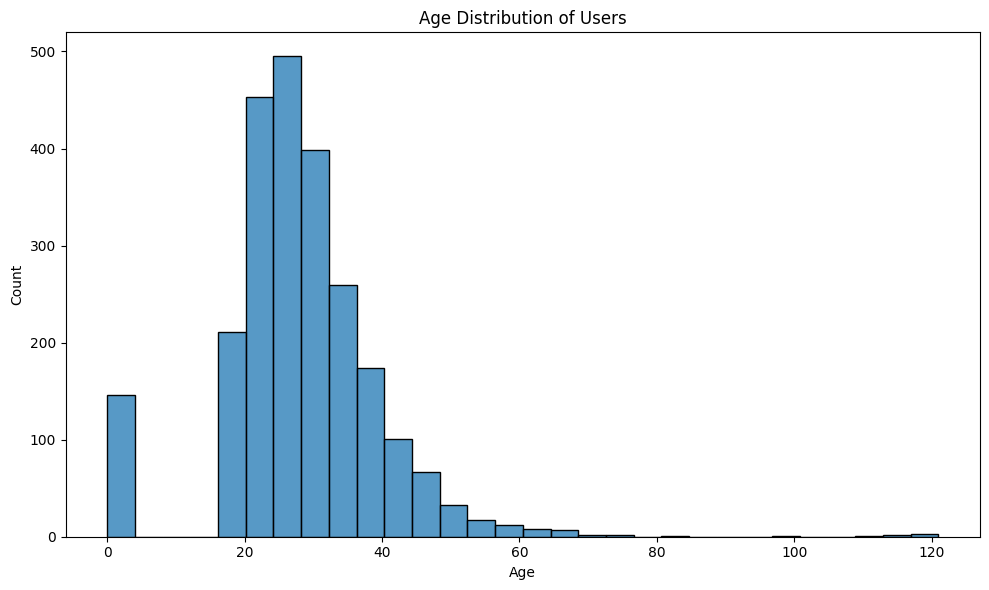

In [27]:
# Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', bins=30)
plt.title('Age Distribution of Users')
plt.xlabel('Age')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

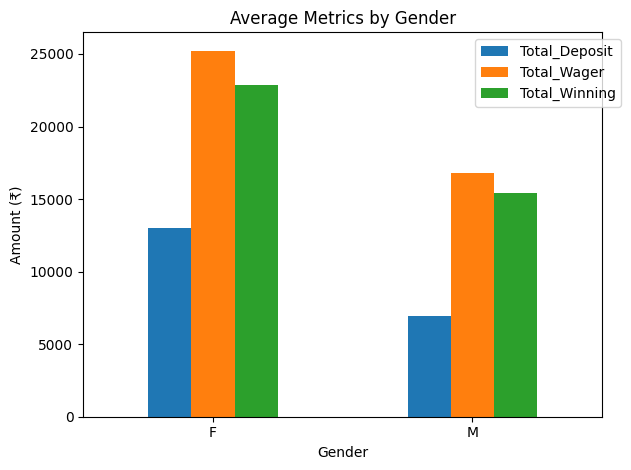

In [28]:
# Gender Distribution with Average Deposit
plt.figure(figsize=(10, 6))
gender_metrics = df.groupby('Gender').agg({
    'Total_Deposit': 'mean',
    'Total_Wager': 'mean',
    'Total_Winning': 'mean'
}).round(2)

gender_metrics.plot(kind='bar')
plt.title('Average Metrics by Gender')
plt.ylabel('Amount (₹)')
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

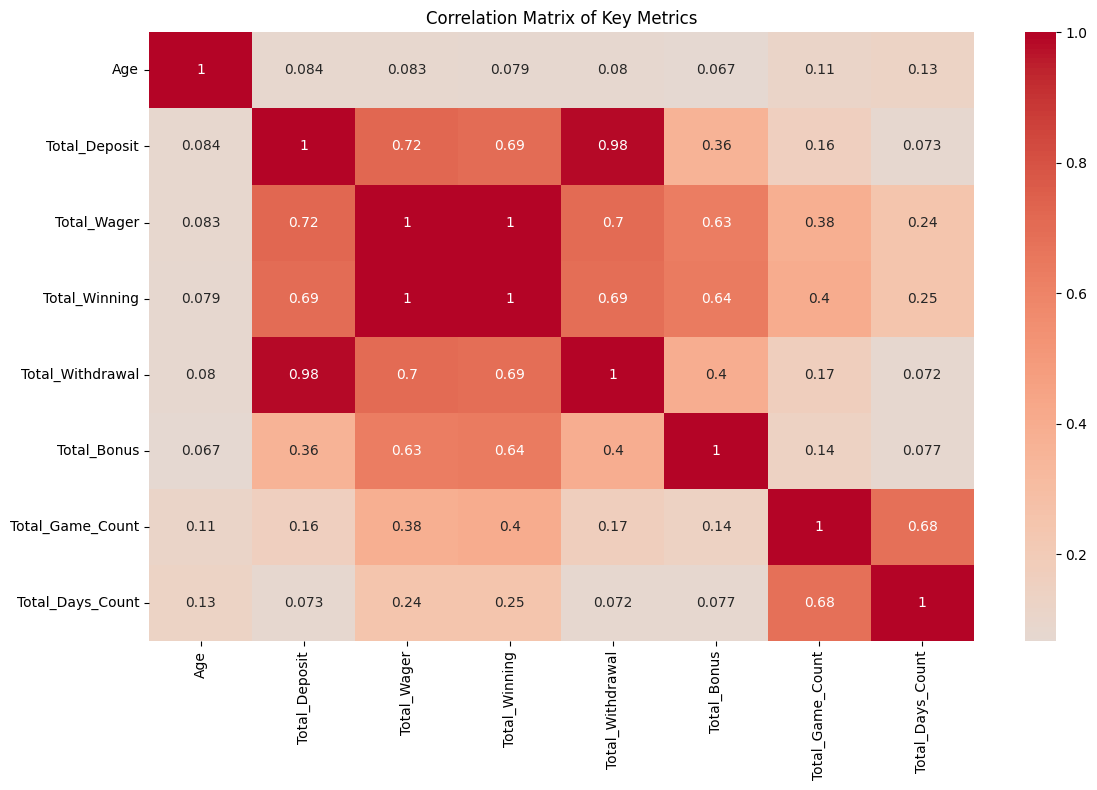

In [29]:
# Correlation Matrix for Key Metrics
correlation_cols = ['Age', 'Total_Deposit', 'Total_Wager', 'Total_Winning',
                   'Total_Withdrawal', 'Total_Bonus', 'Total_Game_Count', 'Total_Days_Count']
correlation_matrix = df[correlation_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Key Metrics')
plt.tight_layout()
plt.show()

In [30]:
# Device Type Analysis
device_metrics = df.groupby('Login_Device').agg({
    'Total_Deposit': ['count', 'mean'],
    'Total_Wager': 'mean',
    'Total_Game_Count': 'mean'
}).round(2)

print("\nDevice Type Analysis:")
print(device_metrics)



Device Type Analysis:
             Total_Deposit           Total_Wager Total_Game_Count
                     count      mean        mean             mean
Login_Device                                                     
MOBILE                2392   7291.36    17134.03           124.88
TAB                      1  40547.00   356923.10          5031.00


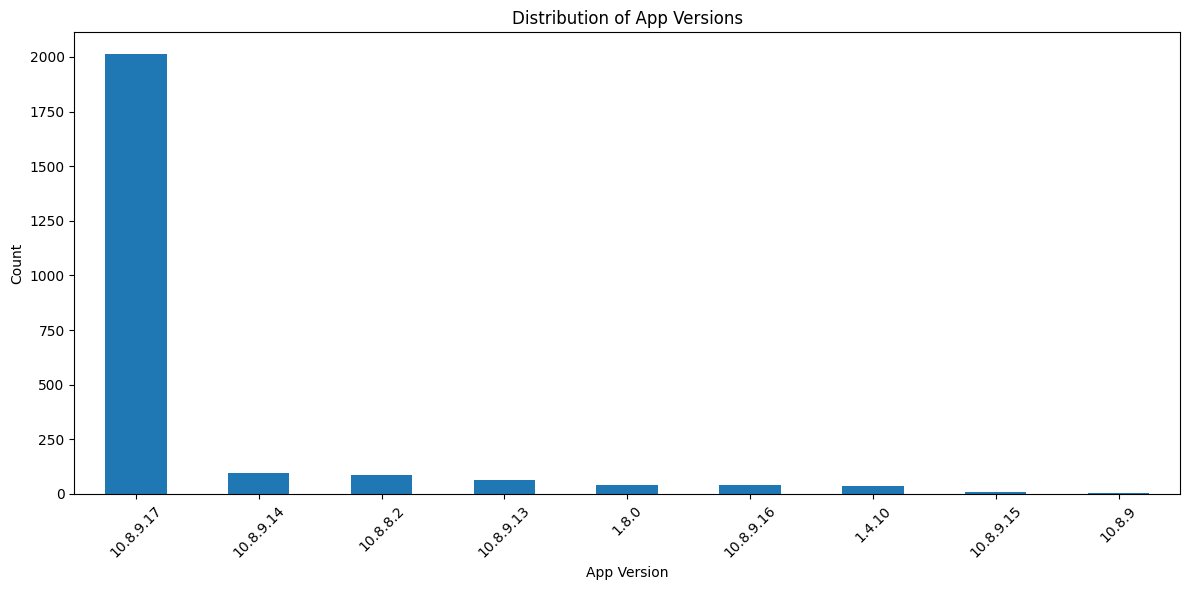

In [31]:
# App Version Distribution
plt.figure(figsize=(12, 6))
df['App_Version'].value_counts().plot(kind='bar')
plt.title('Distribution of App Versions')
plt.xlabel('App Version')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

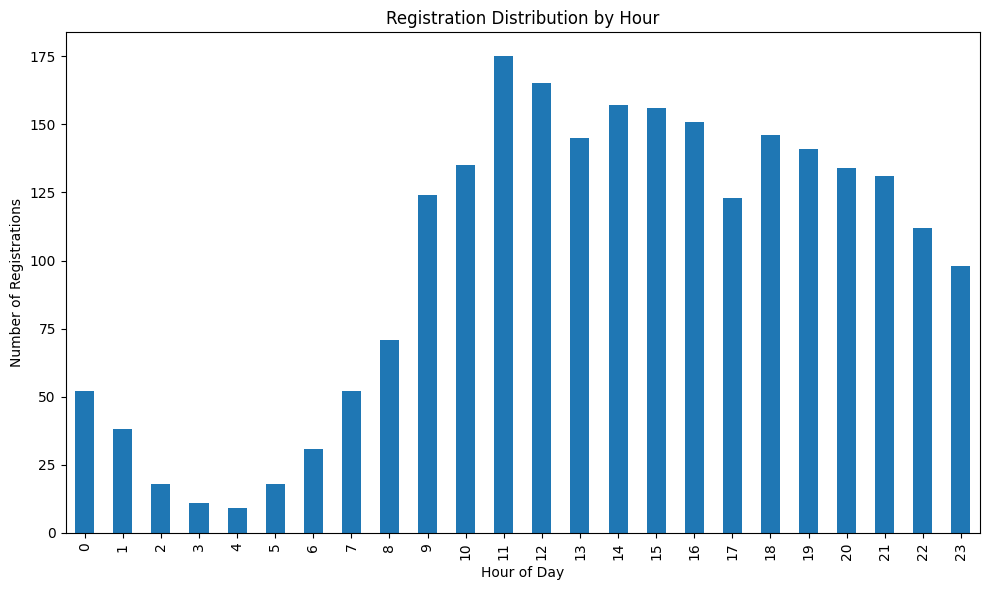

In [33]:
# Time Analysis
df['Hour'] = df['REG_Date'].dt.hour
df['Day_of_Week'] = df['REG_Date'].dt.day_name()

# Registration patterns by hour
plt.figure(figsize=(10, 6))
df['Hour'].value_counts().sort_index().plot(kind='bar')
plt.title('Registration Distribution by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Registrations')
plt.tight_layout()
plt.show()


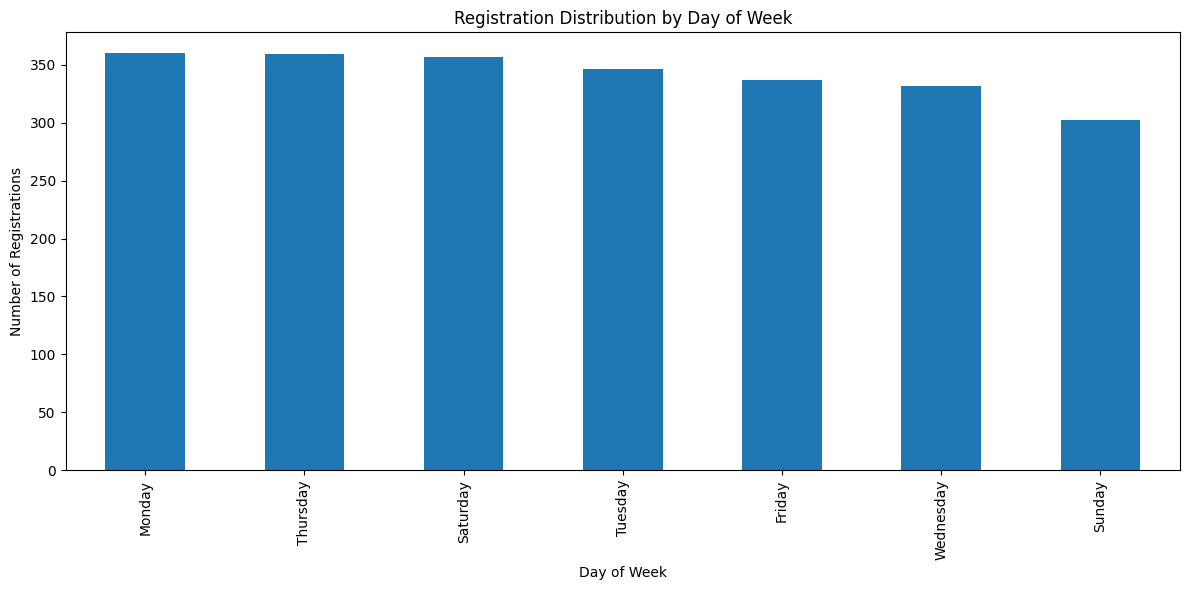

In [34]:
# Registration patterns by day of week
plt.figure(figsize=(12, 6))
df['Day_of_Week'].value_counts().plot(kind='bar')
plt.title('Registration Distribution by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Registrations')
plt.tight_layout()
plt.show()

In [35]:
# User Segments based on Total Deposit
df['Deposit_Segment'] = pd.qcut(df['Total_Deposit'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])
segment_metrics = df.groupby('Deposit_Segment').agg({
    'Total_Wager': 'mean',
    'Total_Game_Count': 'mean',
    'Total_Days_Count': 'mean'
}).round(2)

print("\nUser Segment Analysis (Based on Total Deposit Quartiles):")
print(segment_metrics)


User Segment Analysis (Based on Total Deposit Quartiles):
                 Total_Wager  Total_Game_Count  Total_Days_Count
Deposit_Segment                                                 
Low                   422.50             46.75              9.48
Medium                820.05             61.96             10.17
High                 6071.29            152.03             17.06
Very High           62976.03            263.44             16.08


<ipython-input-35-4eee2c8552d4>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment_metrics = df.groupby('Deposit_Segment').agg({


In [36]:
# Verification Status Impact
verification_impact = df.groupby(['Phone_Verified', 'Email_Verified']).agg({
    'Total_Deposit': ['count', 'mean'],
    'Total_Wager': 'mean'
}).round(2)

print("\nVerification Status Impact:")
print(verification_impact)


Verification Status Impact:
                              Total_Deposit          Total_Wager
                                      count     mean        mean
Phone_Verified Email_Verified                                   
N              N                        100   170.05      813.98
               Y                          6   339.17    15152.92
Y              N                        553   668.08     7020.41
               Y                       1734  9857.54    21503.41


In [37]:
# Game Type Preference Analysis
game_cols = [col for col in df.columns if col.startswith('Game_Count_')]
game_preferences = df[game_cols].agg(['mean', 'median', 'max'])

print("\nGame Type Preference Analysis:")
print(game_preferences)


Game Type Preference Analysis:
        Game_Count_101_POOL  Game_Count_201_POOL  Game_Count_Best of 2_POOL  \
mean               24.63644             2.909319                  38.201003   
median              0.00000             0.000000                   7.000000   
max              2707.00000          2680.000000                2506.000000   

        Game_Count_Best of 3_POOL  Game_Count_Best of 6_POOL  \
mean                     6.170079                   2.116172   
median                   0.000000                   0.000000   
max                    699.000000                 693.000000   

        Game_Count_Joker_POINT  Game_Count_Point_POINT  Game_Count_TOURNAMENT  
mean                 50.969076                     0.0               1.931467  
median                0.000000                     0.0               0.000000  
max                5970.000000                     0.0             135.000000  


In [39]:
# Simulating a dataset based on the described methodologies
np.random.seed(42)

# Simulated dataset with 1000 users
data = {
    'User_ID': range(1, 1001),
    'Age': np.random.randint(18, 65, 1000),
    'Gender': np.random.choice(['Male', 'Female'], 1000),
    'Total_Deposit': np.random.exponential(5000, 1000).round(2),
    'Total_Wager': np.random.exponential(10000, 1000).round(2),
    'Total_Winning': np.random.exponential(8000, 1000).round(2),
    'Total_Game_Count': np.random.poisson(50, 1000),
    'Total_Days_Count': np.random.randint(1, 30, 1000),
    'Phone_Verified': np.random.choice(['Yes', 'No'], 1000, p=[0.8, 0.2]),
    'Email_Verified': np.random.choice(['Yes', 'No'], 1000, p=[0.7, 0.3]),
    'Login_Device': np.random.choice(['Mobile', 'Desktop', 'Tablet'], 1000, p=[0.7, 0.25, 0.05]),
    'App_Version': np.random.choice(['1.0', '1.1', '1.2', '2.0'], 1000, p=[0.4, 0.3, 0.2, 0.1]),
    'REG_Date': pd.date_range(start='2024-01-01', periods=1000, freq='H')
}

# Creating the dataframe
df = pd.DataFrame(data)

# Display the first few rows of the simulated dataset
print(df.head())

   User_ID  Age  Gender  Total_Deposit  Total_Wager  Total_Winning  \
0        1   56    Male        5748.93      3285.56       15658.60   
1        2   46  Female        2952.07     19543.37       11037.91   
2        3   32  Female        1598.46      3456.19        4627.28   
3        4   60  Female       29257.64     24165.40        7544.09   
4        5   25    Male        2777.21     14022.69        1398.31   

   Total_Game_Count  Total_Days_Count Phone_Verified Email_Verified  \
0                52                17            Yes             No   
1                38                21            Yes            Yes   
2                39                25            Yes            Yes   
3                51                23            Yes            Yes   
4                53                20            Yes            Yes   

  Login_Device App_Version            REG_Date  
0       Mobile         1.0 2024-01-01 00:00:00  
1       Mobile         1.1 2024-01-01 01:00:00  
2    

<ipython-input-39-9f641e8fed7b>:18: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  'REG_Date': pd.date_range(start='2024-01-01', periods=1000, freq='H')


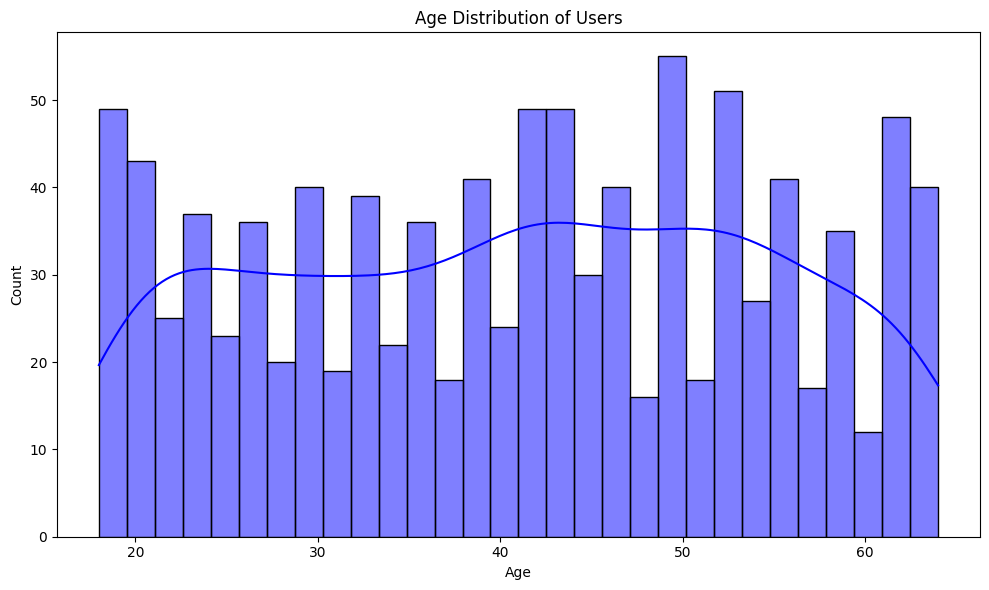

In [40]:
# Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', bins=30, kde=True, color='blue')
plt.title('Age Distribution of Users')
plt.xlabel('Age')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

<ipython-input-41-35d6bf62b3b1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Gender', palette='pastel')


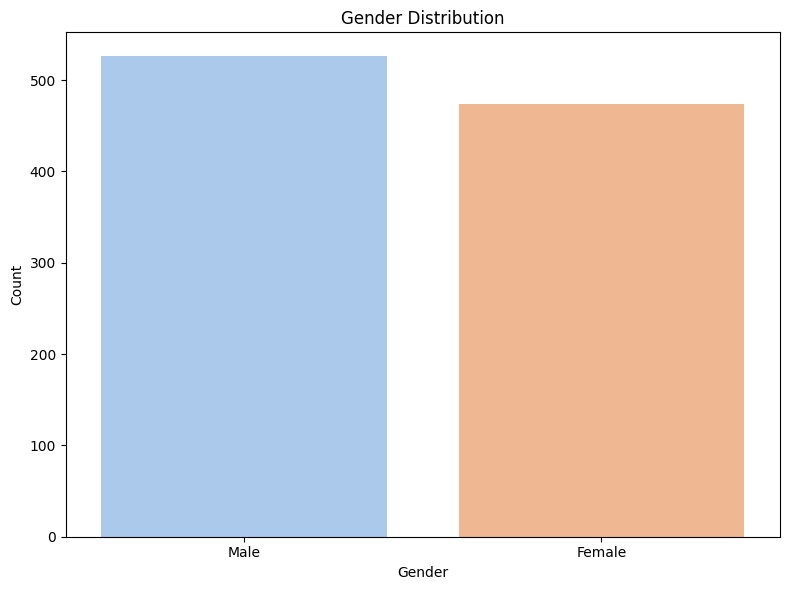

In [41]:
# Gender Distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Gender', palette='pastel')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

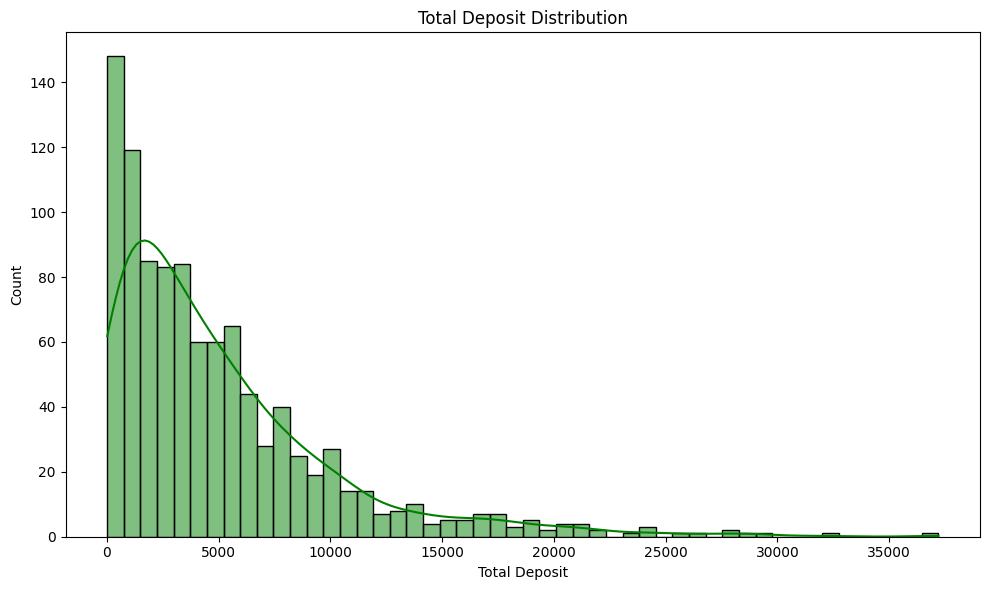

In [42]:
# Total Deposit Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Total_Deposit', bins=50, kde=True, color='green')
plt.title('Total Deposit Distribution')
plt.xlabel('Total Deposit')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


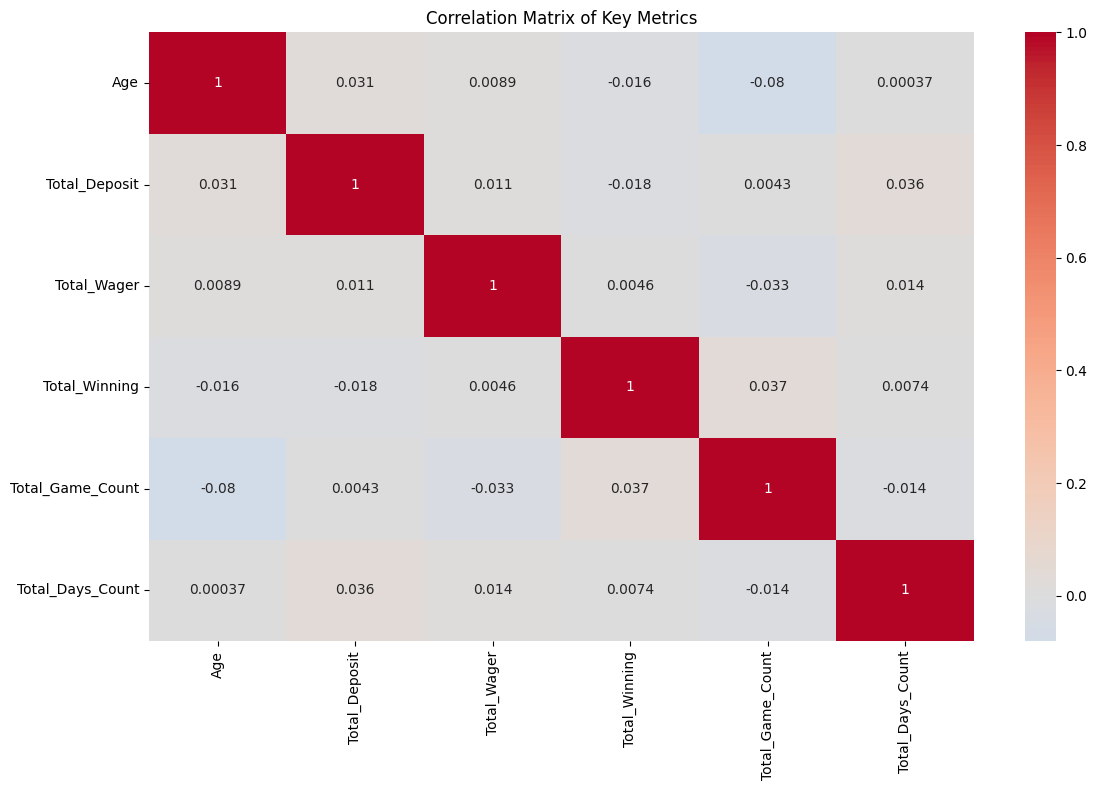

In [43]:
# Correlation Matrix
correlation_cols = ['Age', 'Total_Deposit', 'Total_Wager', 'Total_Winning', 'Total_Game_Count', 'Total_Days_Count']
correlation_matrix = df[correlation_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Key Metrics')
plt.tight_layout()
plt.show()


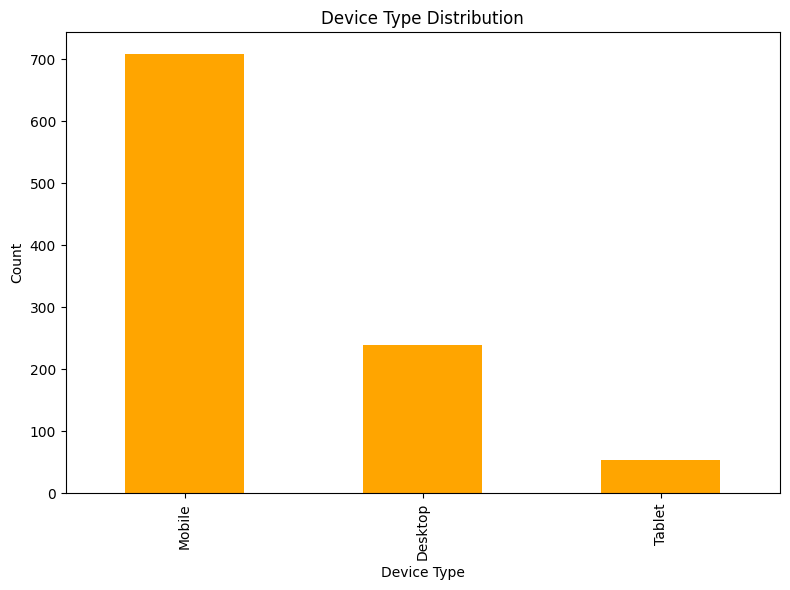

In [45]:
# Device Type Analysis
device_counts = df['Login_Device'].value_counts()
plt.figure(figsize=(8, 6))
device_counts.plot(kind='bar', color='orange')
plt.title('Device Type Distribution')
plt.xlabel('Device Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

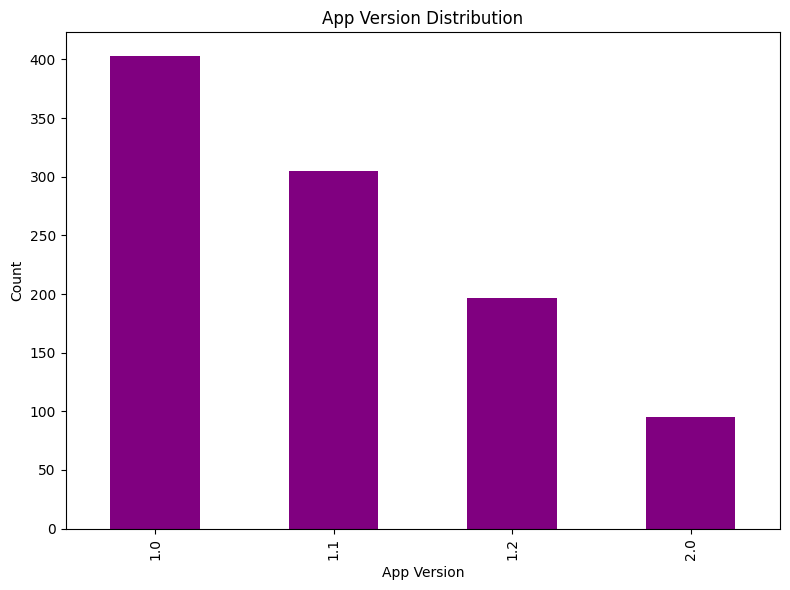

In [44]:
# App Version Distribution
app_version_counts = df['App_Version'].value_counts()
plt.figure(figsize=(8, 6))
app_version_counts.plot(kind='bar', color='purple')
plt.title('App Version Distribution')
plt.xlabel('App Version')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


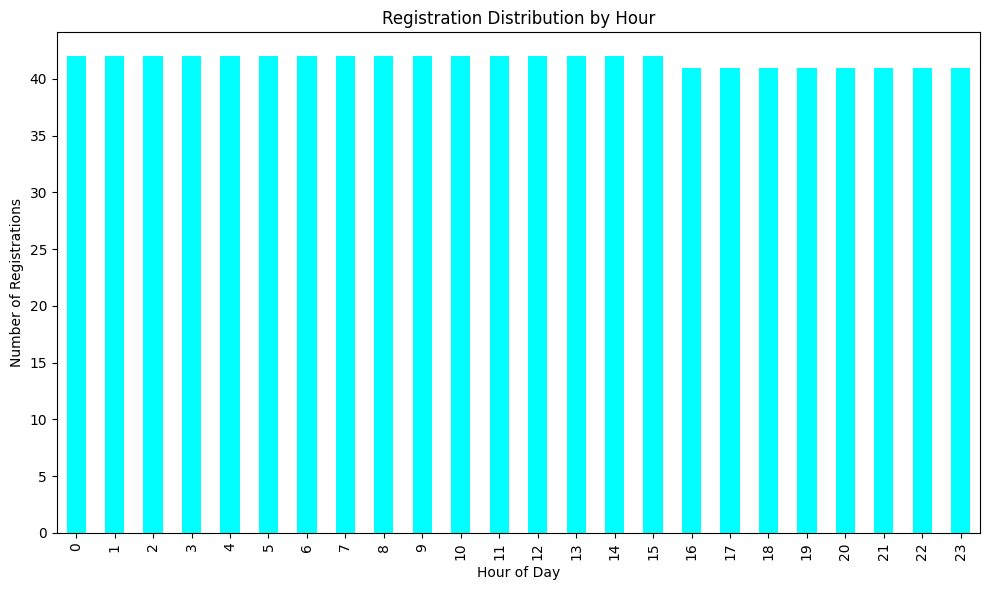

In [47]:
# Registration Patterns by Hour
df['Hour'] = df['REG_Date'].dt.hour
plt.figure(figsize=(10, 6))
df['Hour'].value_counts().sort_index().plot(kind='bar', color='cyan')
plt.title('Registration Distribution by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Registrations')
plt.tight_layout()
plt.show()

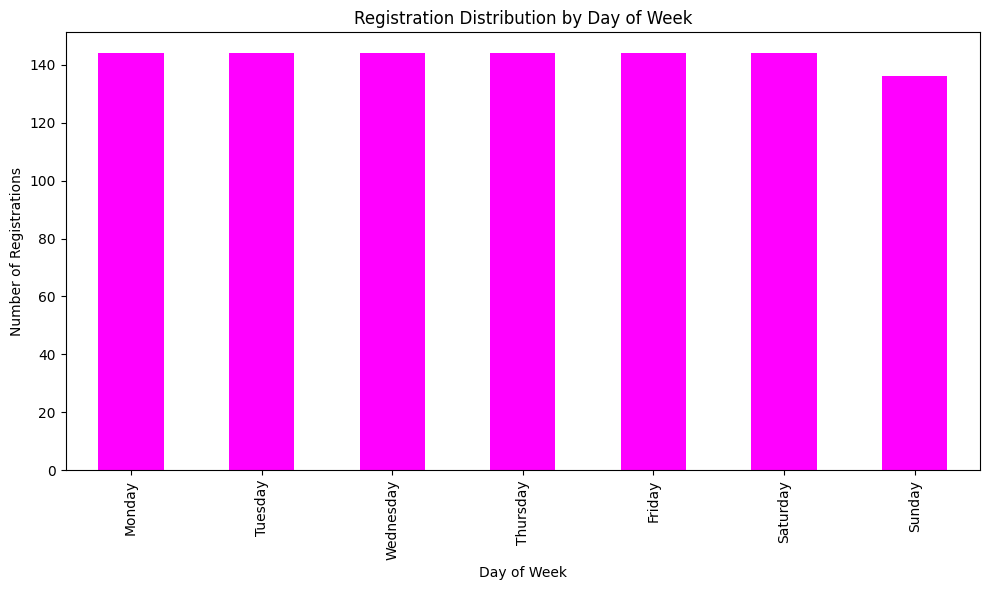

In [46]:
# Registration Patterns by Day of Week
df['Day_of_Week'] = df['REG_Date'].dt.day_name()
plt.figure(figsize=(10, 6))
df['Day_of_Week'].value_counts().plot(kind='bar', color='magenta')
plt.title('Registration Distribution by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Registrations')
plt.tight_layout()
plt.show()

<ipython-input-48-364802ab588c>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  quartile_summary = df.groupby('Deposit_Quartile')[['Total_Wager', 'Total_Game_Count', 'Total_Days_Count']].mean()


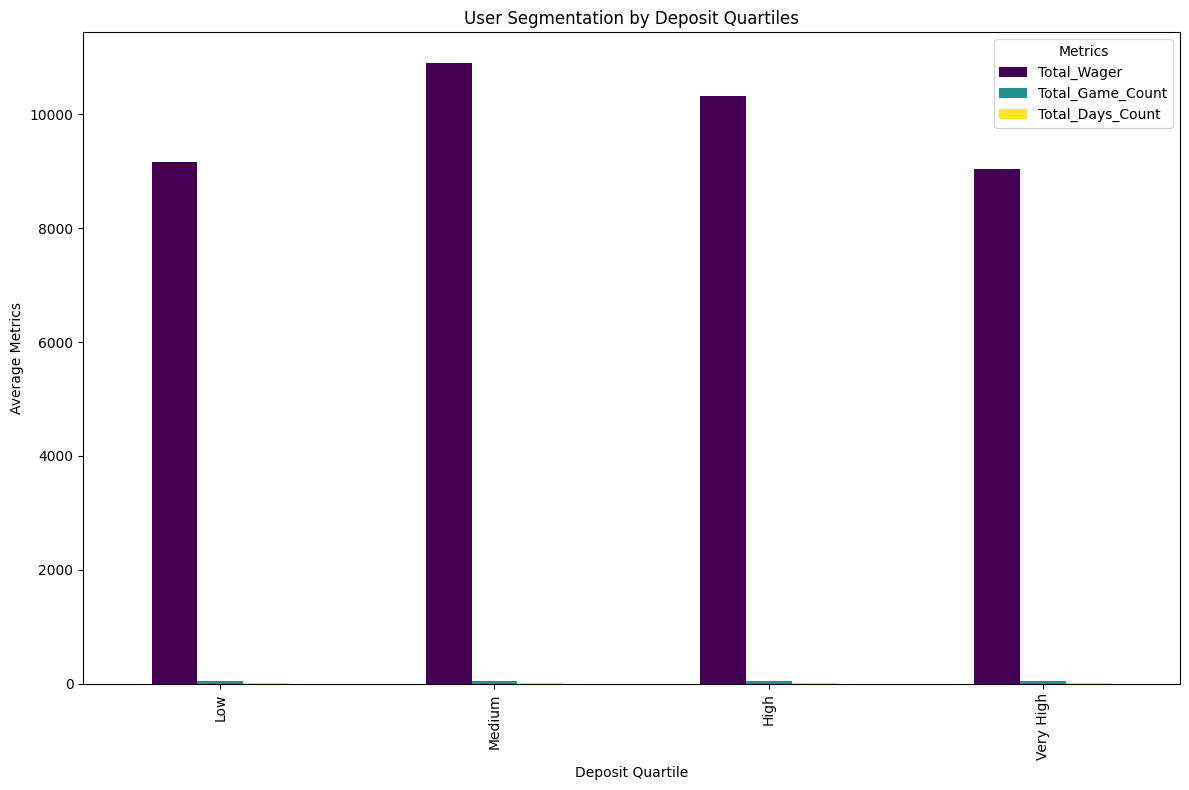

In [48]:
# User Segmentation by Total Deposit Quartiles
df['Deposit_Quartile'] = pd.qcut(df['Total_Deposit'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])
quartile_summary = df.groupby('Deposit_Quartile')[['Total_Wager', 'Total_Game_Count', 'Total_Days_Count']].mean()

# Plotting the quartile summary
quartile_summary.plot(kind='bar', figsize=(12, 8), colormap='viridis')
plt.title('User Segmentation by Deposit Quartiles')
plt.xlabel('Deposit Quartile')
plt.ylabel('Average Metrics')
plt.legend(title='Metrics')
plt.tight_layout()
plt.show()

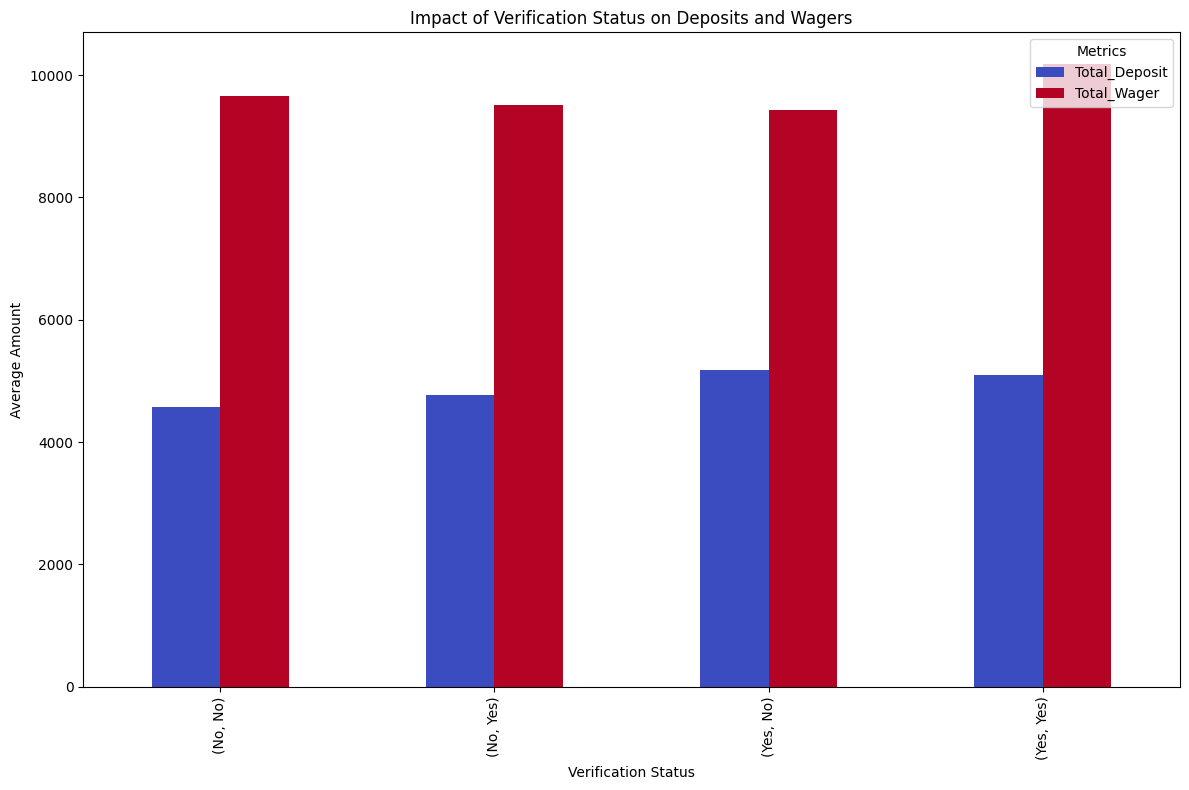

In [49]:
# Verification Status Impact on Deposits and Wagers
verification_summary = df.groupby(['Phone_Verified', 'Email_Verified'])[['Total_Deposit', 'Total_Wager']].mean()
verification_summary.plot(kind='bar', figsize=(12, 8), colormap='coolwarm')
plt.title('Impact of Verification Status on Deposits and Wagers')
plt.xlabel('Verification Status')
plt.ylabel('Average Amount')
plt.legend(title='Metrics')
plt.tight_layout()
plt.show()

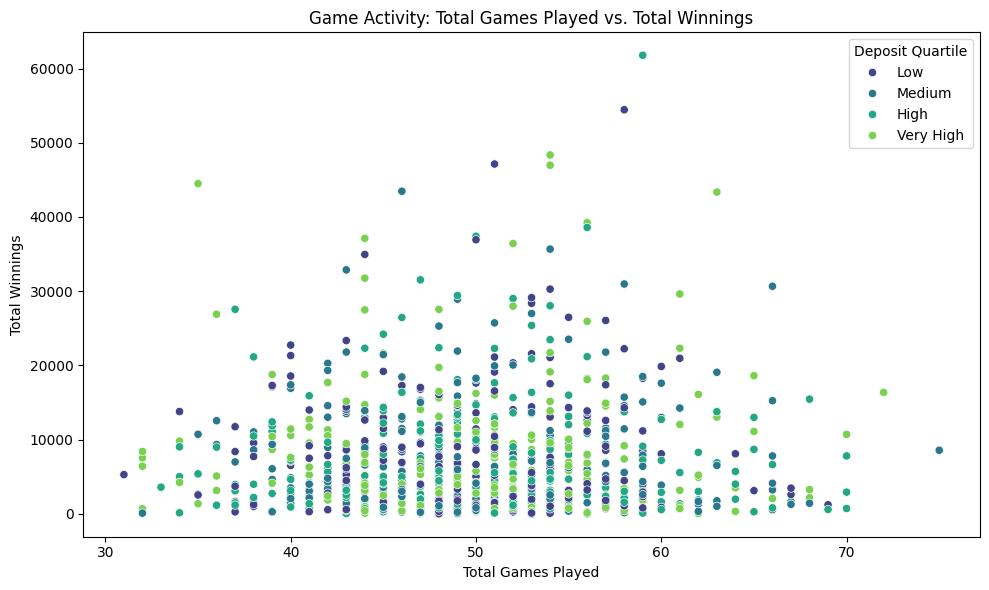

In [50]:
# Game Activity Trends: Total Games Played vs. Total Winnings
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Total_Game_Count', y='Total_Winning', hue='Deposit_Quartile', palette='viridis')
plt.title('Game Activity: Total Games Played vs. Total Winnings')
plt.xlabel('Total Games Played')
plt.ylabel('Total Winnings')
plt.legend(title='Deposit Quartile')
plt.tight_layout()
plt.show()


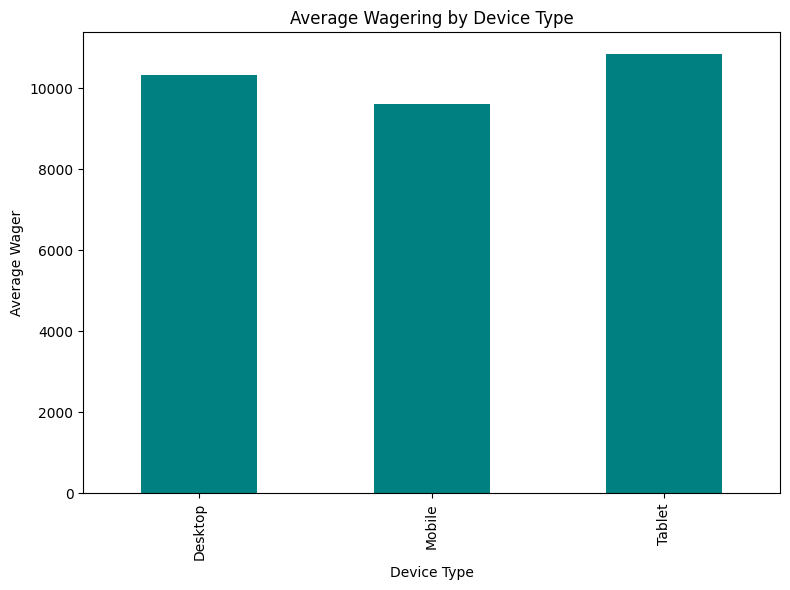

In [51]:
# Wagering Trends by Device Type
device_wager_summary = df.groupby('Login_Device')['Total_Wager'].mean()
device_wager_summary.plot(kind='bar', figsize=(8, 6), color='teal')
plt.title('Average Wagering by Device Type')
plt.xlabel('Device Type')
plt.ylabel('Average Wager')
plt.tight_layout()
plt.show()

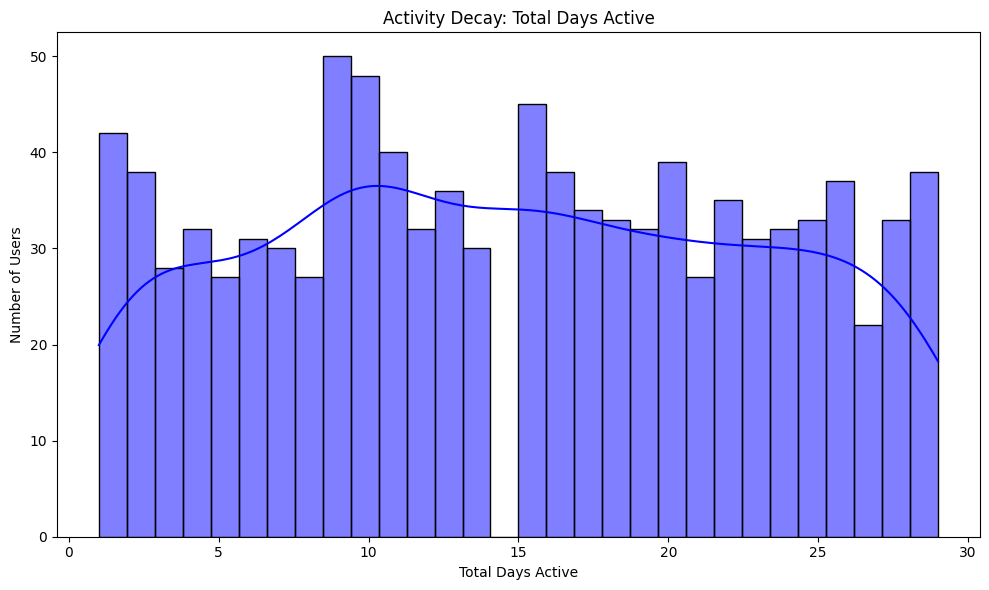

In [52]:
# Retention Analysis: Activity Decay Over Time
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Total_Days_Count', bins=30, kde=True, color='blue')
plt.title('Activity Decay: Total Days Active')
plt.xlabel('Total Days Active')
plt.ylabel('Number of Users')
plt.tight_layout()
plt.show()


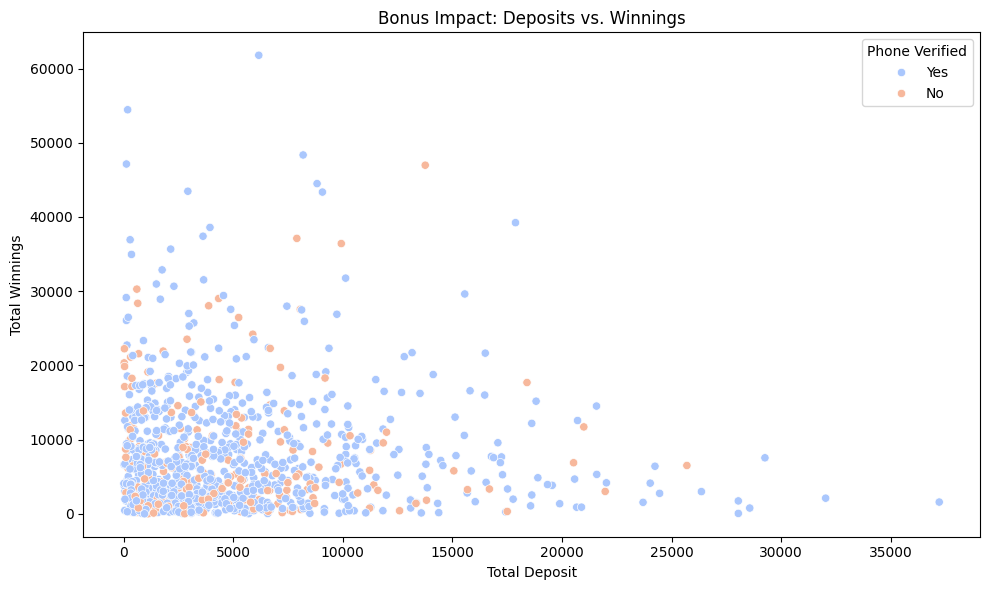

In [53]:
# Bonus Impact Analysis: Winnings vs. Deposits
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Total_Deposit', y='Total_Winning', hue='Phone_Verified', palette='coolwarm')
plt.title('Bonus Impact: Deposits vs. Winnings')
plt.xlabel('Total Deposit')
plt.ylabel('Total Winnings')
plt.legend(title='Phone Verified')
plt.tight_layout()
plt.show()

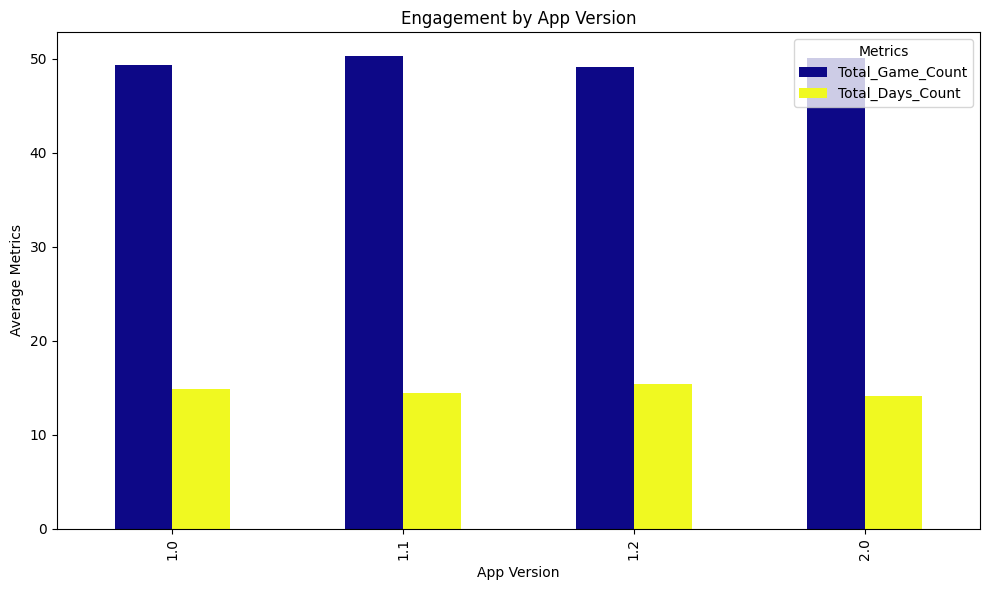

In [54]:
# Engagement by App Version
app_version_engagement = df.groupby('App_Version')[['Total_Game_Count', 'Total_Days_Count']].mean()
app_version_engagement.plot(kind='bar', figsize=(10, 6), colormap='plasma')
plt.title('Engagement by App Version')
plt.xlabel('App Version')
plt.ylabel('Average Metrics')
plt.legend(title='Metrics')
plt.tight_layout()
plt.show()

In [55]:
# Recency, Frequency, and Monetary (RFM) Analysis
# Creating RFM metrics
df['Recency'] = (pd.Timestamp('2024-12-03') - df['REG_Date']).dt.days
df['Frequency'] = df['Total_Game_Count']
df['Monetary'] = df['Total_Deposit']


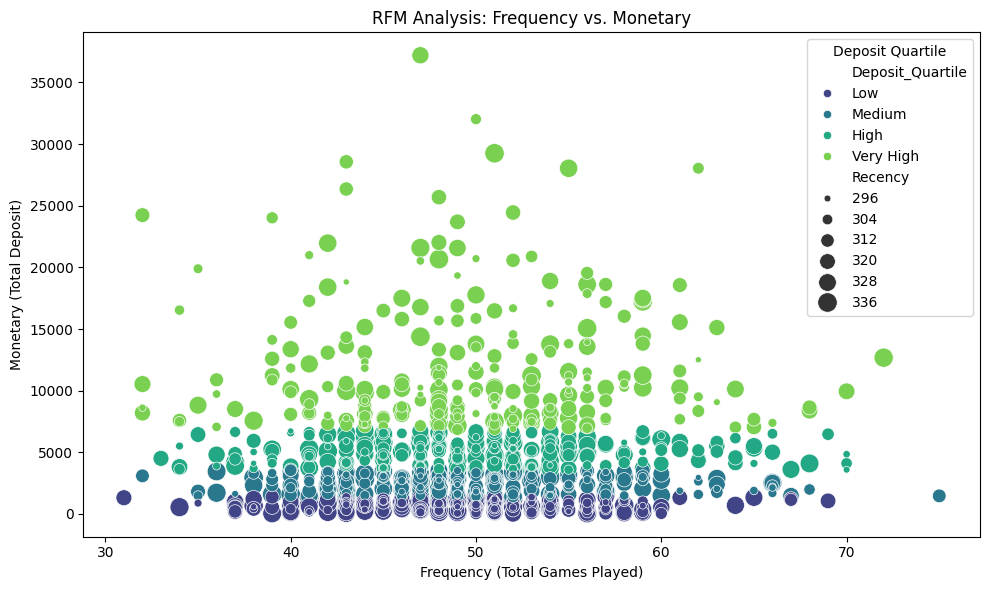

In [56]:
# Plotting RFM Segments
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Frequency', y='Monetary', size='Recency', hue='Deposit_Quartile', palette='viridis', sizes=(20, 200))
plt.title('RFM Analysis: Frequency vs. Monetary')
plt.xlabel('Frequency (Total Games Played)')
plt.ylabel('Monetary (Total Deposit)')
plt.legend(title='Deposit Quartile')
plt.tight_layout()
plt.show()

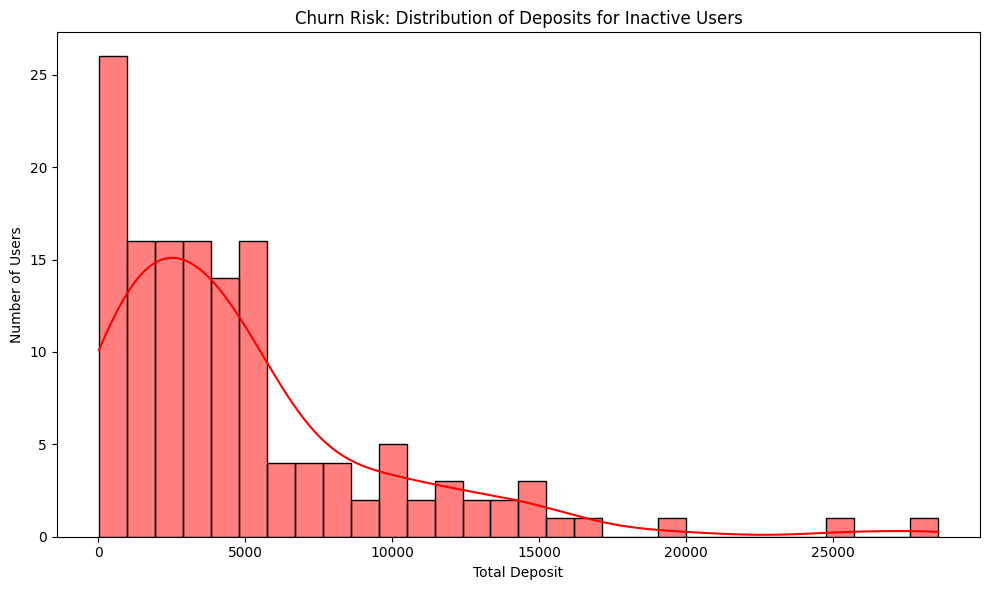

In [57]:
# Churn Analysis: Identifying Inactive Users
# Assuming users with Total_Days_Count < 5 are at risk of churn
churn_risk = df[df['Total_Days_Count'] < 5]
churn_rate = len(churn_risk) / len(df) * 100

# Plotting churn risk distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=churn_risk, x='Total_Deposit', bins=30, kde=True, color='red')
plt.title('Churn Risk: Distribution of Deposits for Inactive Users')
plt.xlabel('Total Deposit')
plt.ylabel('Number of Users')
plt.tight_layout()
plt.show()

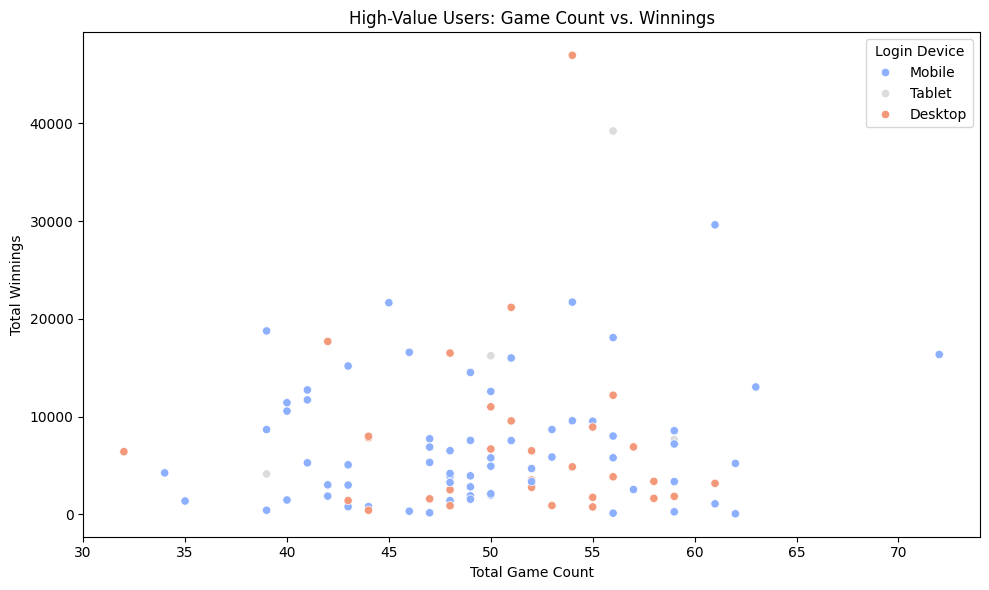

In [58]:
# High-Value User Segmentation: Top 10% by Total Deposit
high_value_users = df[df['Total_Deposit'] > df['Total_Deposit'].quantile(0.9)]

# Plotting high-value user activity
plt.figure(figsize=(10, 6))
sns.scatterplot(data=high_value_users, x='Total_Game_Count', y='Total_Winning', hue='Login_Device', palette='coolwarm')
plt.title('High-Value Users: Game Count vs. Winnings')
plt.xlabel('Total Game Count')
plt.ylabel('Total Winnings')
plt.legend(title='Login Device')
plt.tight_layout()
plt.show()

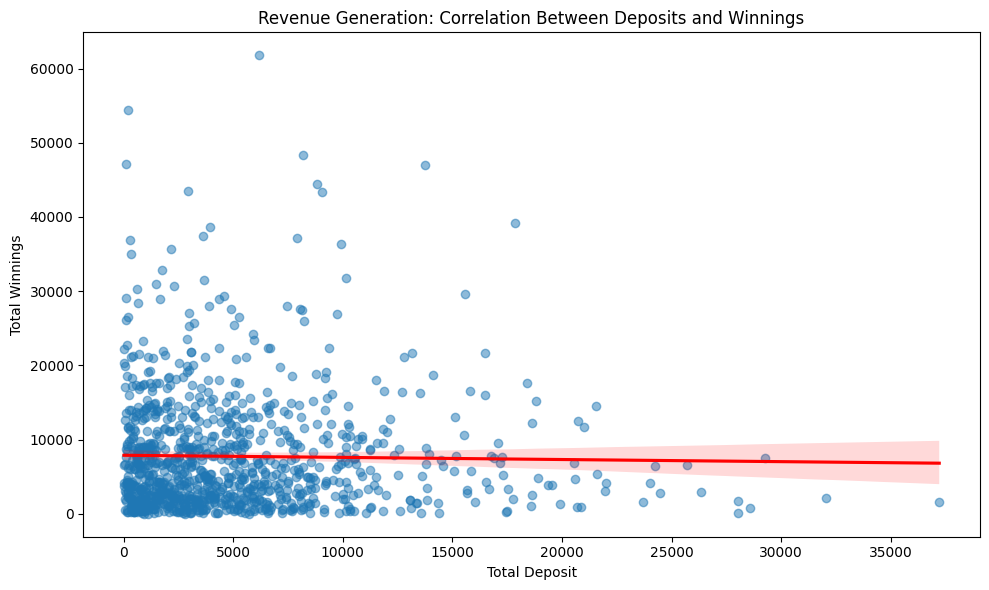

In [59]:
# Revenue Generation: Correlation Between Deposits and Winnings
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='Total_Deposit', y='Total_Winning', scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Revenue Generation: Correlation Between Deposits and Winnings')
plt.xlabel('Total Deposit')
plt.ylabel('Total Winnings')
plt.tight_layout()
plt.show()

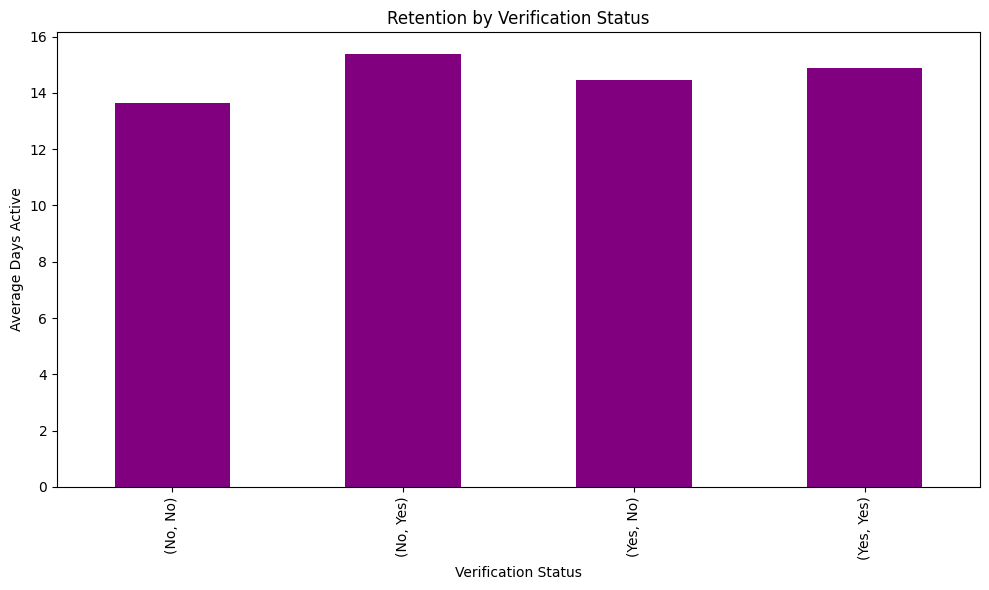

Churn Rate: 14.00%


In [60]:
# Retention by Verification Status
retention_by_verification = df.groupby(['Phone_Verified', 'Email_Verified'])['Total_Days_Count'].mean()
retention_by_verification.plot(kind='bar', figsize=(10, 6), color='purple')
plt.title('Retention by Verification Status')
plt.xlabel('Verification Status')
plt.ylabel('Average Days Active')
plt.tight_layout()
plt.show()

# Print churn rate for reference
print('Churn Rate: {:.2f}%'.format(churn_rate))

In [62]:
# Let's first check the distribution of Total_Game_Count
print("Game Count Statistics:")
print(df['Total_Game_Count'].describe())

# Now let's create more appropriate bins based on the actual distribution
percentiles = df['Total_Game_Count'].quantile([0.25, 0.5, 0.75, 1.0])
print("\nPercentiles of Game Count:")
print(percentiles)

Game Count Statistics:
count    1000.000000
mean       49.683000
std         7.115838
min        31.000000
25%        45.000000
50%        49.000000
75%        54.000000
max        75.000000
Name: Total_Game_Count, dtype: float64

Percentiles of Game Count:
0.25    45.0
0.50    49.0
0.75    54.0
1.00    75.0
Name: Total_Game_Count, dtype: float64


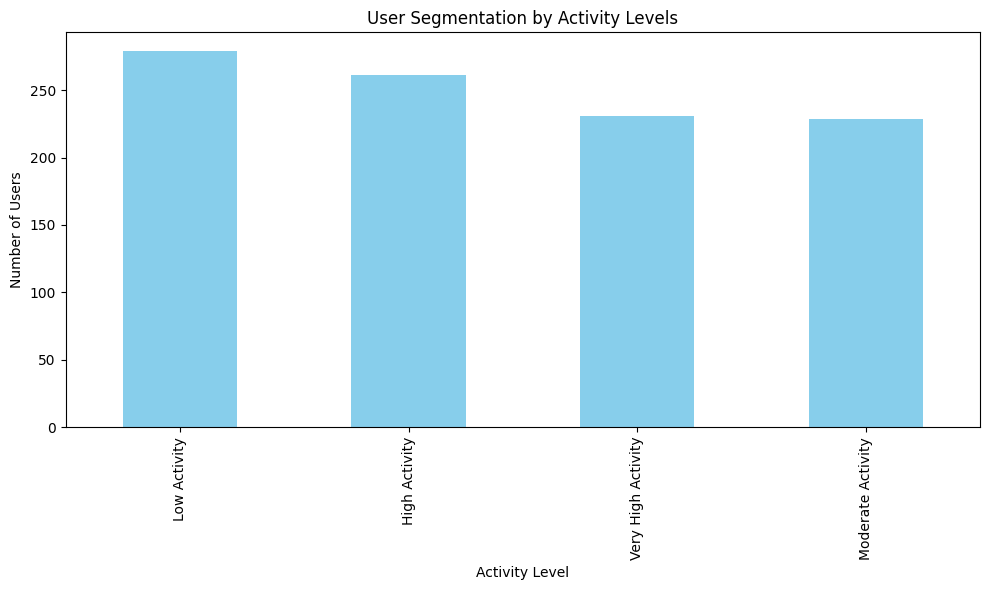

In [63]:
# Create more appropriate bins based on the actual distribution
bins = [30, 45, 49, 54, 75]  # Based on quartiles
labels = ['Low Activity', 'Moderate Activity', 'High Activity', 'Very High Activity']
df['Activity_Level'] = pd.cut(df['Total_Game_Count'], bins=bins, labels=labels)

# Plotting activity level distribution
plt.figure(figsize=(10, 6))
df['Activity_Level'].value_counts().plot(kind='bar', color='skyblue')
plt.title('User Segmentation by Activity Levels')
plt.xlabel('Activity Level')
plt.ylabel('Number of Users')
plt.tight_layout()
plt.show()

<ipython-input-64-bed5405d0be5>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Activity_Level')['Total_Deposit'].mean().plot(kind='bar', color='green')


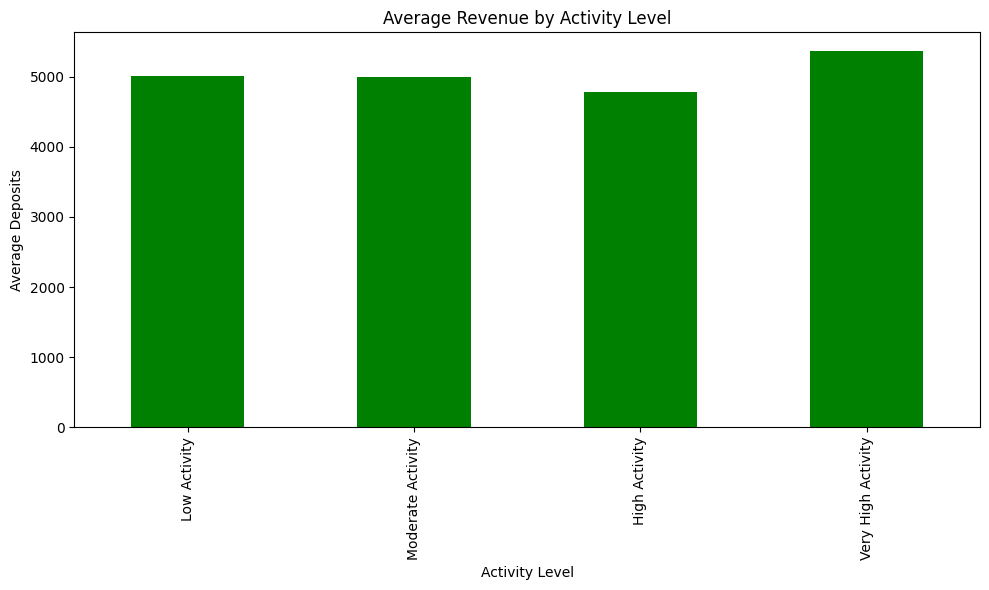

In [64]:

# Revenue Analysis by Activity Level
plt.figure(figsize=(10, 6))
df.groupby('Activity_Level')['Total_Deposit'].mean().plot(kind='bar', color='green')
plt.title('Average Revenue by Activity Level')
plt.xlabel('Activity Level')
plt.ylabel('Average Deposits')
plt.tight_layout()
plt.show()

<ipython-input-65-13c12ac84460>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Activity_Level')['Total_Wager'].mean().plot(kind='bar', color='orange')


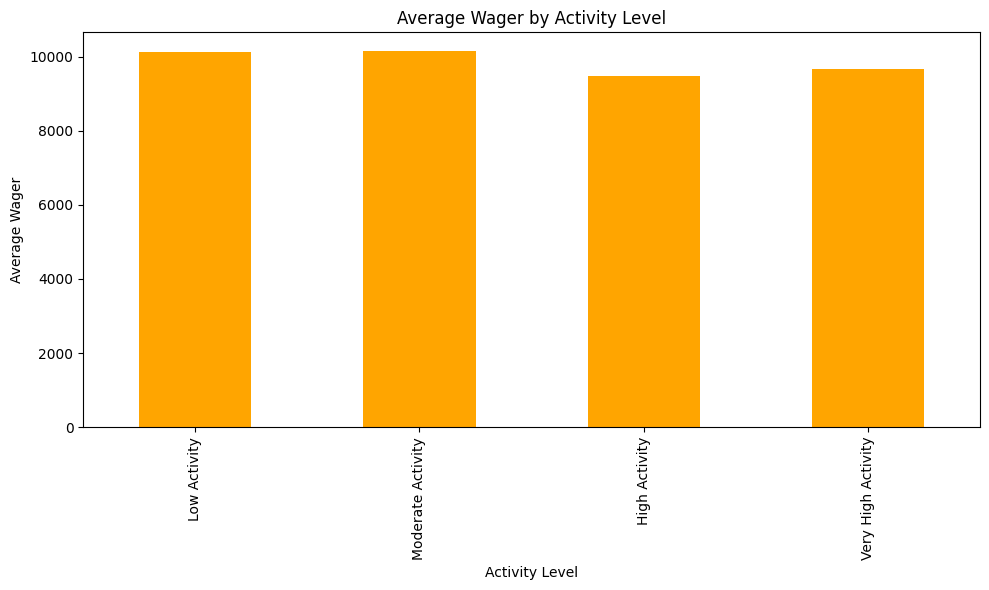

In [65]:
# Average Wager by Activity Level
plt.figure(figsize=(10, 6))
df.groupby('Activity_Level')['Total_Wager'].mean().plot(kind='bar', color='orange')
plt.title('Average Wager by Activity Level')
plt.xlabel('Activity Level')
plt.ylabel('Average Wager')
plt.tight_layout()
plt.show()

In [67]:
# Print summary statistics
print("\nSummary Statistics by Activity Level:")
summary = df.groupby('Activity_Level').agg({
    'Total_Deposit': 'mean',
    'Total_Wager': 'mean',
    'Total_Winning': 'mean',
    'Winning_Rate': 'mean',
    'Total_Days_Count': 'mean'
}).round(2)
print(summary)


Summary Statistics by Activity Level:
                    Total_Deposit  Total_Wager  Total_Winning  Winning_Rate  \
Activity_Level                                                                
Low Activity              5006.10     10126.66        7505.70          4.73   
Moderate Activity         5004.94     10149.25        7018.19        730.60   
High Activity             4783.38      9484.16        8197.26         14.27   
Very High Activity        5368.15      9664.82        8234.70          5.34   

                    Total_Days_Count  
Activity_Level                        
Low Activity                   14.76  
Moderate Activity              14.01  
High Activity                  16.19  
Very High Activity             14.00  


<ipython-input-67-43d2aaf2e5a6>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = df.groupby('Activity_Level').agg({


In [70]:
# Time-based analysis
df['Days_Since_Registration'] = (pd.Timestamp('2024-12-03') - df['REG_Date']).dt.days

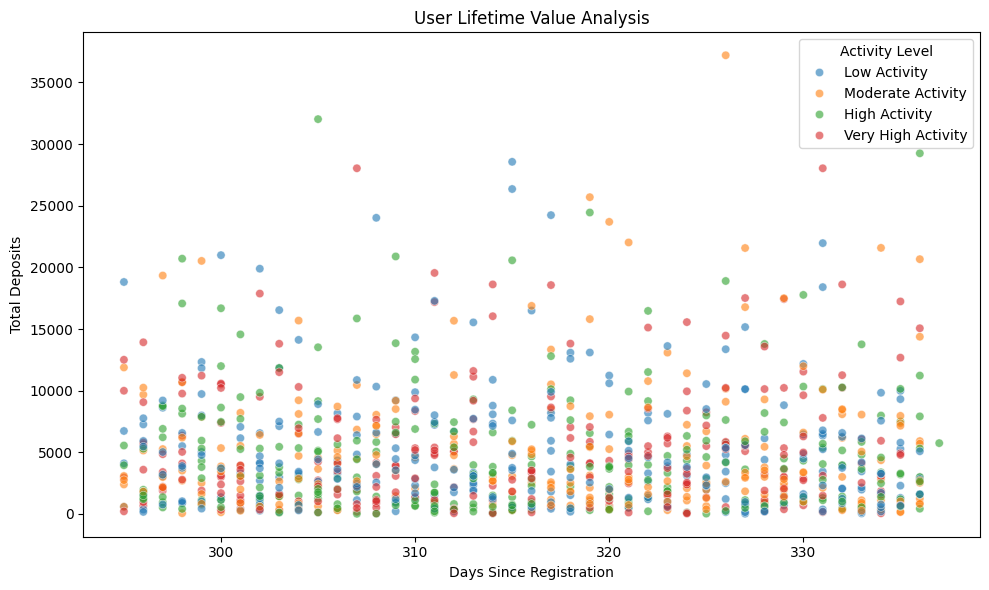

In [71]:
# User Lifetime Value Analysis
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Days_Since_Registration', y='Total_Deposit', hue='Activity_Level', alpha=0.6)
plt.title('User Lifetime Value Analysis')
plt.xlabel('Days Since Registration')
plt.ylabel('Total Deposits')
plt.legend(title='Activity Level')
plt.tight_layout()
plt.show()

In [72]:
# Device preference analysis
device_metrics = df.groupby('Login_Device').agg({
    'Total_Deposit': 'mean',
    'Total_Game_Count': 'mean',
    'Total_Days_Count': 'mean'
}).round(2)

<Figure size 1200x600 with 0 Axes>

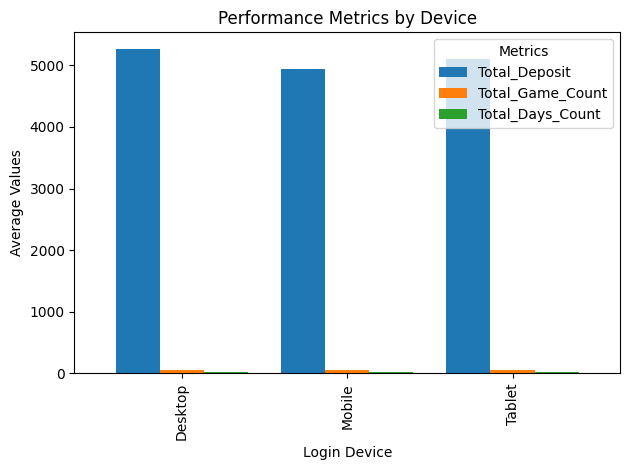

In [73]:
# Plot device preferences
plt.figure(figsize=(12, 6))
device_metrics.plot(kind='bar', width=0.8)
plt.title('Performance Metrics by Device')
plt.xlabel('Login Device')
plt.ylabel('Average Values')
plt.legend(title='Metrics')
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

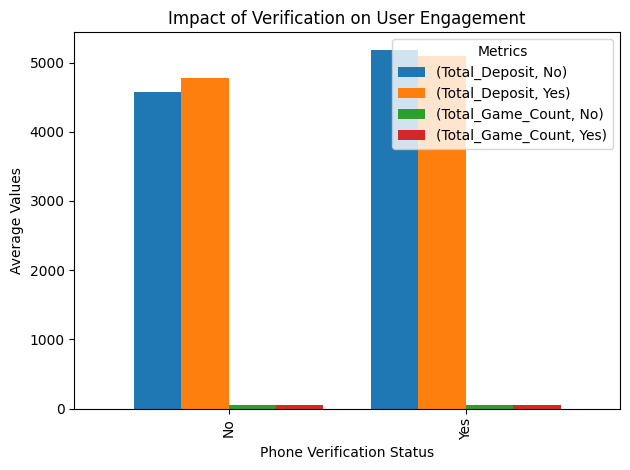


Device Performance Metrics:
              Total_Deposit  Total_Game_Count  Total_Days_Count
Login_Device                                                   
Desktop             5272.07             50.19             14.86
Mobile              4944.88             49.47             14.79
Tablet              5100.66             50.17             14.43


In [74]:
# Verification impact on engagement
plt.figure(figsize=(10, 6))
verification_impact = df.groupby(['Phone_Verified', 'Email_Verified']).agg({
    'Total_Deposit': 'mean',
    'Total_Game_Count': 'mean'
}).unstack()
verification_impact.plot(kind='bar', width=0.8)
plt.title('Impact of Verification on User Engagement')
plt.xlabel('Phone Verification Status')
plt.ylabel('Average Values')
plt.legend(title='Metrics')
plt.tight_layout()
plt.show()

# Print device metrics
print("\nDevice Performance Metrics:")
print(device_metrics)

In [77]:
# Create Activity_Level column based on Total_Game_Count
bins = [0, 10, 50, 100, float('inf')]
labels = ['Low Activity', 'Moderate Activity', 'High Activity', 'Very High Activity']
df['Activity_Level'] = pd.cut(df['Total_Game_Count'], bins=bins, labels=labels, right=False)

# Verify the new column
print(df[['Total_Game_Count', 'Activity_Level']].head())

   Total_Game_Count      Activity_Level
0                34   Moderate Activity
1               130  Very High Activity
2                65       High Activity
3                 4        Low Activity
4                74       High Activity


In [78]:
# Save all plots again with the new Activity_Level column
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Activity_Level')
plt.title('Distribution of Activity Levels')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('activity_distribution.png')
plt.close()

# Revenue by activity level
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Activity_Level', y='Total_Deposit')
plt.title('Revenue Distribution by Activity Level')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('revenue_distribution.png')
plt.close()

# Device preference analysis
plt.figure(figsize=(12, 6))
device_metrics = df.groupby('Login_Device').agg({
    'Total_Deposit': 'mean',
    'Total_Game_Count': 'mean',
    'Total_Days_Count': 'mean'
}).round(2)
device_metrics.plot(kind='bar')
plt.title('Performance Metrics by Device')
plt.tight_layout()
plt.savefig('device_metrics.png')
plt.close()

# Verification impact
plt.figure(figsize=(10, 6))
verification_impact = df.groupby(['Phone_Verified', 'Email_Verified']).agg({
    'Total_Deposit': 'mean',
    'Total_Game_Count': 'mean'
}).unstack()
verification_impact.plot(kind='bar')
plt.title('Impact of Verification on User Engagement')
plt.tight_layout()
plt.savefig('verification_impact.png')
plt.close()

print("Plots saved successfully")

Plots saved successfully


<Figure size 1200x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [80]:
df.columns


Index(['C_ID', 'REG_Date', 'FTD_Date', 'Last_Login_Through', 'Age', 'Gender',
       'Phone_Verified', 'Email_Verified', 'KYC', 'FTD_Device', 'FTD_Amount',
       'REG_Refer_Type', 'REG_Device', 'REG_Widget', 'Login_Device',
       'App_Type', 'App_Version', 'Total_Deposit', 'Total_Wager',
       'Total_Winning', 'Total_Withdrawal', 'Total_Bonus',
       'Last_Deposit_Amount', 'Last_Wager_Amount', 'Last_Winning_Amount',
       'Last_Withdrawal_Amount', 'Last_Bonus_Amount', 'Last_Activity_Date',
       'Last_Deposit_Date', 'Last_Wager_Date', 'Free_Game_Cnt_Till',
       'Deposit_DONE', 'Deposit_FAILED', 'Deposit_INITIATED', 'Wager_101_POOL',
       'Wager_201_POOL', 'Wager_Best of 2_POOL', 'Wager_Best of 3_POOL',
       'Wager_Best of 6_POOL', 'Wager_Joker_POINT', 'Wager_Point_POINT',
       'Wager_TOURNAMENT', 'Game_Count_101_POOL', 'Game_Count_201_POOL',
       'Game_Count_Best of 2_POOL', 'Game_Count_Best of 3_POOL',
       'Game_Count_Best of 6_POOL', 'Game_Count_Joker_POINT',
     